In [1]:
from sheap.spectra_readers import parallel_reader 
from sheap.MainSheap import Sheapectral 
from sheap.RegionHandler.RegionBuilder import RegionBuilder
from sheap.RegionFitting.RegionFitting import RegionFitting
from sheap.Plotting.SheapPlot import SheapPlot
from sheap.Posterior.ParameterEstimation import ParameterEstimation


In [2]:
import jax 
from jax import jit 
import jax.numpy as jnp
import glob 
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
from paths_func import cross_pandas_spectra
jax.config.update("jax_enable_x64", True)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
path_dr16 = "/home/favila/smbh_mass/dr16"
#path_dr16 = "/home/felipe/work/SMBH_estimation/dr16"

### read

In [5]:
sheapclass = Sheapectral.from_pickle("/home/favila/smbh_mass/sheap/notebooks/model_mode.pkl")

In [6]:
sheapclass.profile_functions

[<PjitFunction of <function gaussian_func at 0x7420011dca40>>,
 <PjitFunction of <function gaussian_func at 0x7420011dca40>>,
 <PjitFunction of <function gaussian_func at 0x7420011dca40>>,
 <PjitFunction of <function gaussian_func at 0x7420011dca40>>,
 <PjitFunction of <function gaussian_func at 0x7420011dca40>>,
 <PjitFunction of <function gaussian_func at 0x7420011dca40>>,
 <PjitFunction of <function gaussian_func at 0x7420011dca40>>,
 <PjitFunction of <function gaussian_func at 0x7420011dca40>>,
 <PjitFunction of <function gaussian_func at 0x7420011dca40>>,
 <PjitFunction of <function gaussian_func at 0x7420011dca40>>,
 <PjitFunction of <function gaussian_func at 0x7420011dca40>>,
 <PjitFunction of <function gaussian_func at 0x7420011dca40>>,
 <PjitFunction of <function gaussian_func at 0x7420011dca40>>,
 <PjitFunction of <function powerlaw at 0x7420011bf380>>,
 <PjitFunction of <function Gsum_model.<locals>.G at 0x741f8bcbbf60>>,
 <PjitFunction of <function Gsum_model.<locals>.G at

In [18]:
sheapclass.profile_names

['gaussian',
 'gaussian',
 'gaussian',
 'gaussian',
 'gaussian',
 'gaussian',
 'gaussian',
 'gaussian',
 'gaussian',
 'gaussian',
 'gaussian',
 'gaussian',
 'gaussian',
 'powerlaw',
 'combine_gaussian',
 'combine_gaussian',
 'combine_gaussian',
 'combine_gaussian',
 'combine_gaussian',
 'combine_gaussian',
 'combine_gaussian',
 'combine_gaussian',
 'combine_gaussian',
 'combine_gaussian']

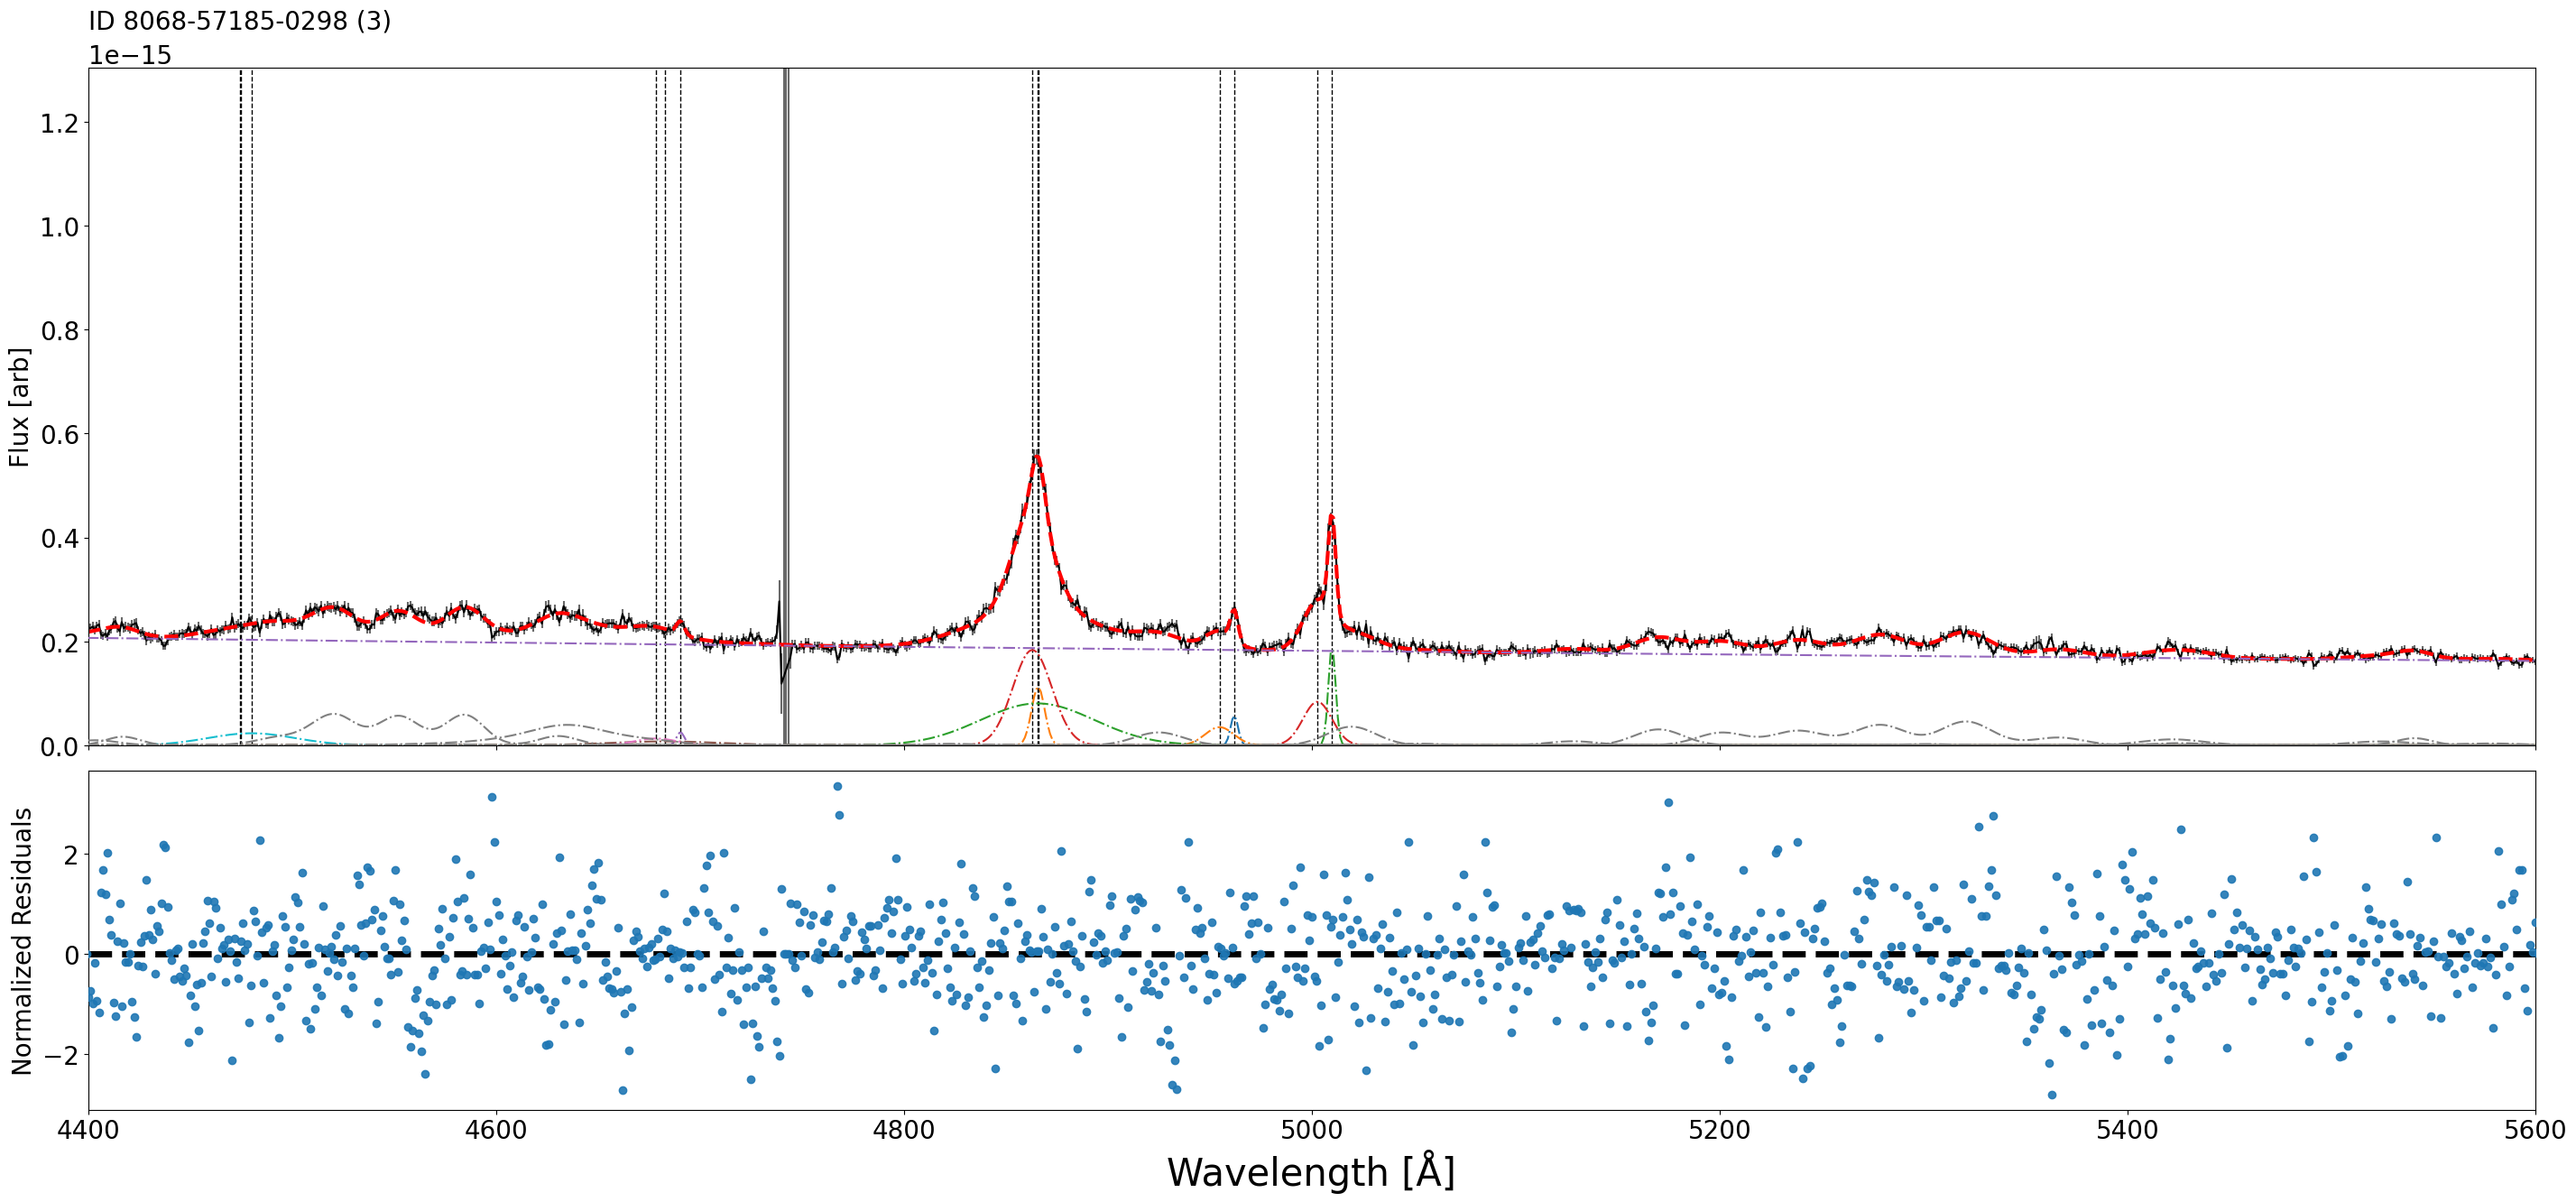

In [7]:
region_plot = SheapPlot(sheapclass)
region_plot.plot(3,add_name=False)#207

In [6]:
params = ParameterEstimation(sheapclass)

here will came the combination


In [12]:
    # bh_mass = params.compute_black_hole_mass(non_combine=True)['Hbeta']

    # # Create plot
    # plt.figure(figsize=(8, 6))  # Increase figure size

    # plt.scatter(params.z, bh_mass, alpha=0.7)  # Log scale for y-axis

    # # Axis labels
    # plt.xlabel('Redshift (z)', fontsize=14)
    # plt.ylabel(r'$\log_{10}(M_{\mathrm{BH}}/M_\odot)$', fontsize=14)

    # # Optional: grid and title
    # #plt.grid(True, which='both', ls='--', alpha=0.5)
    # #plt.title('Black Hole Mass vs Redshift', fontsize=16)

    # plt.tight_layout()
    # plt.show()

In [38]:
sheapclass.build_region(4400, 5600,fe_mode="model",n_broad=2,add_outflow=True,by_region=True,force_linear=False,add_balmercontiniumm=True)
#sheapclass.fit_region()

In [45]:
sheapclass.fit_region()

Fitting 225 spectra
STEP1
learning_rate: 0.1 num_steps: 3000 non_optimize_in_axis: 3
STEP2
learning_rate: 0.01 num_steps: 3000 non_optimize_in_axis: 4


In [ ]:
#sheapclass.save_to_pickle("model_mode.pkl")

Estimated pickle size: 25492.06 KB


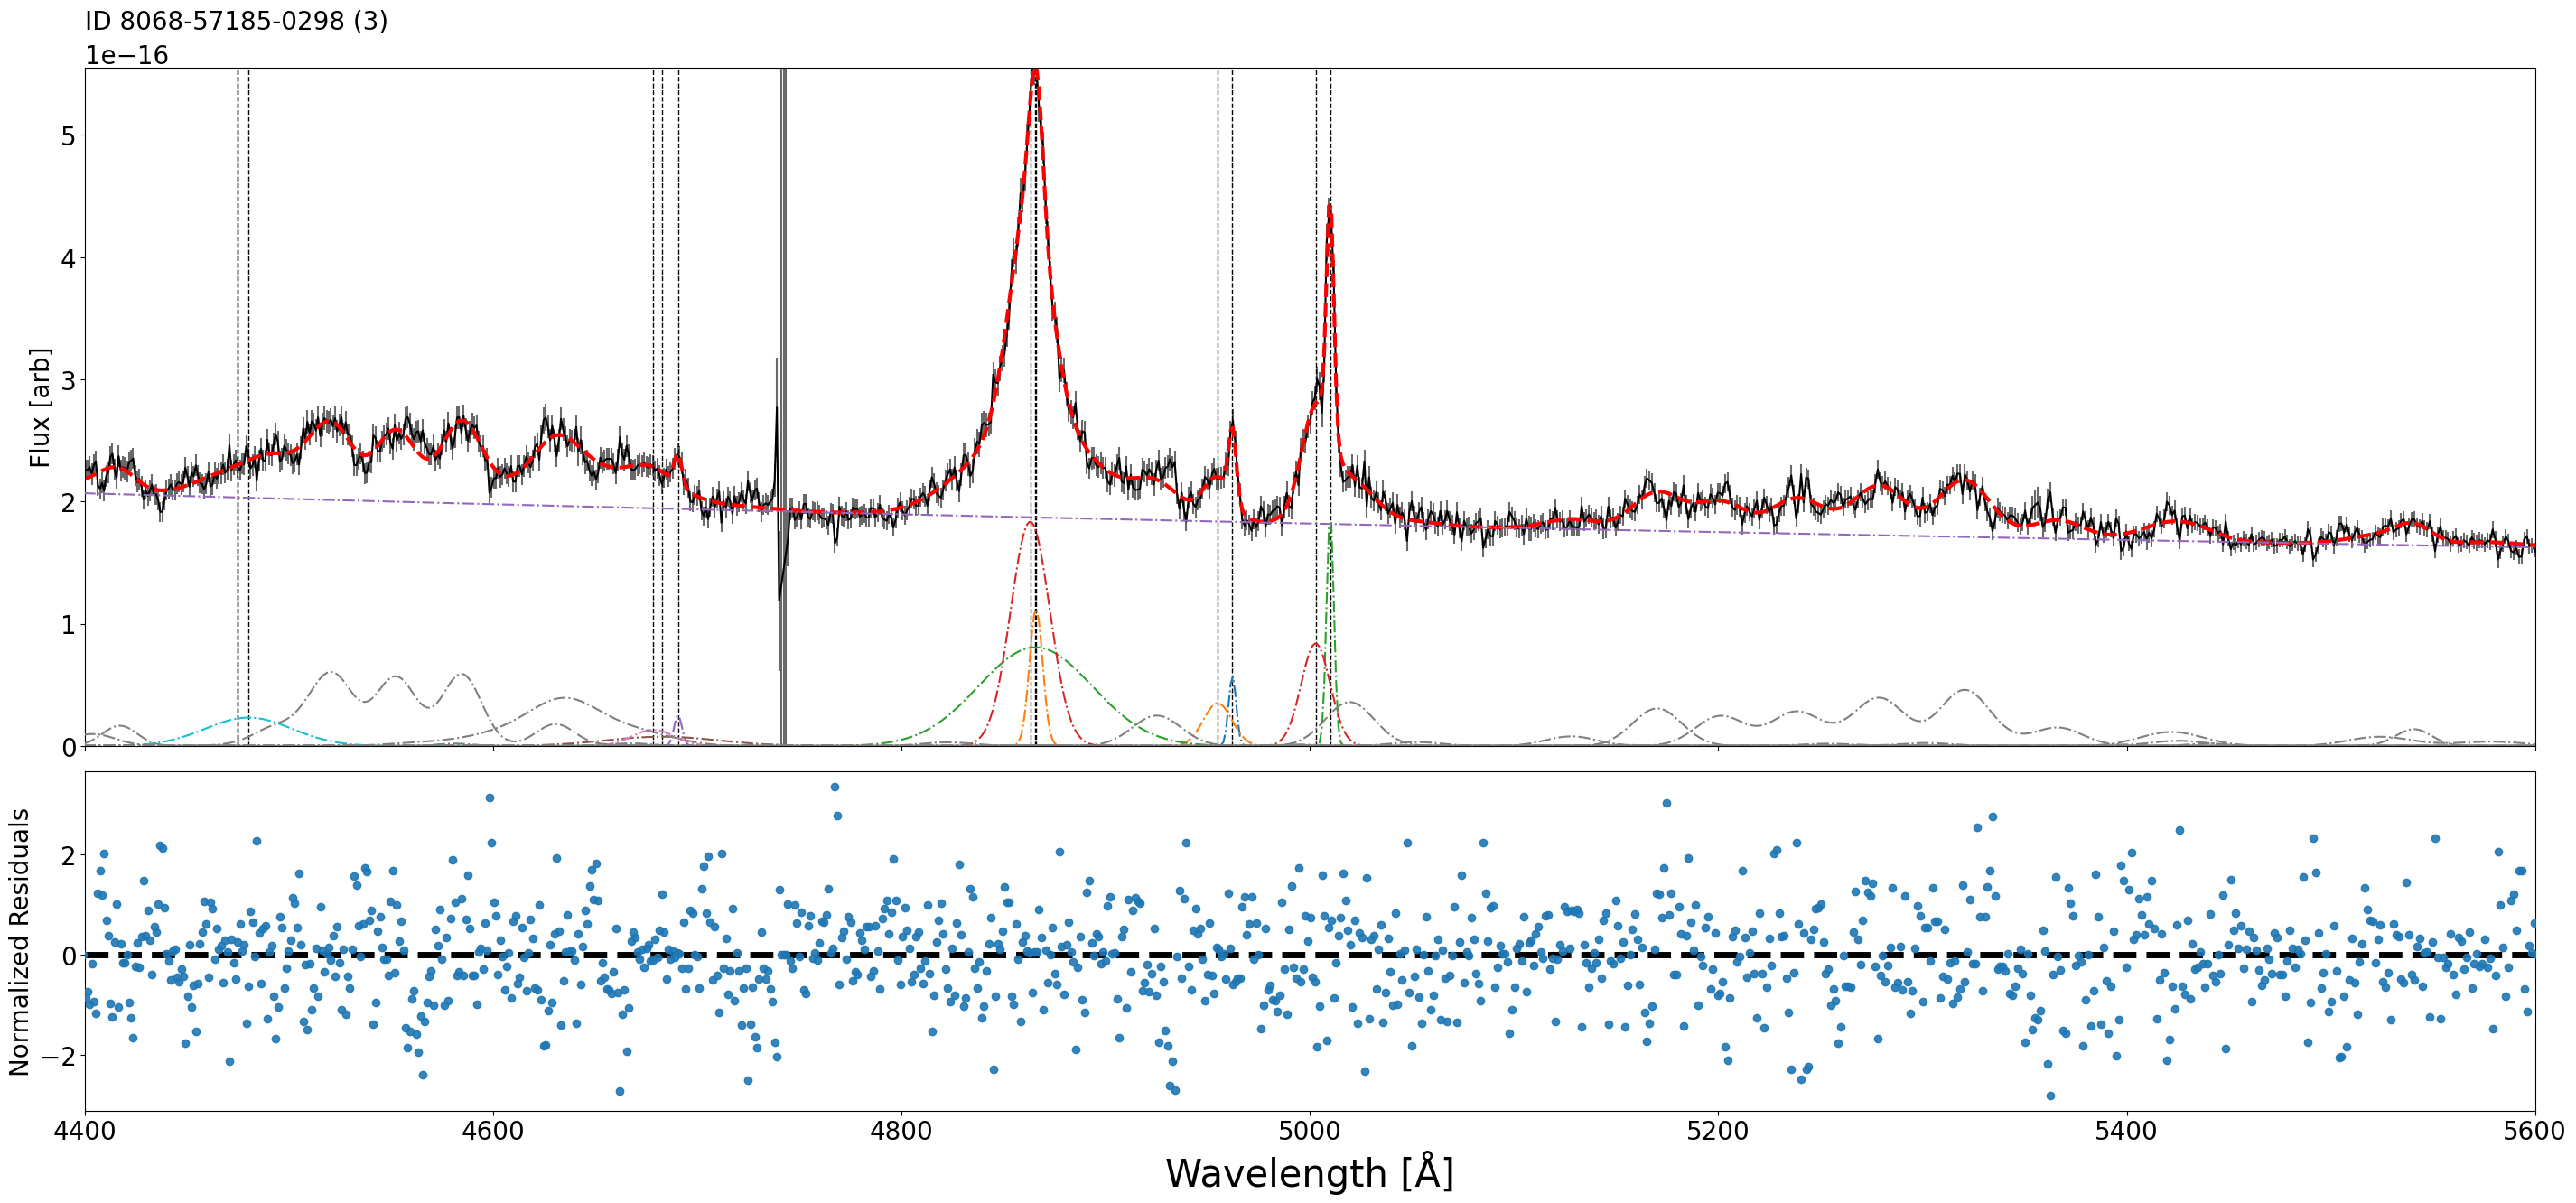

In [ ]:
# from collections import defaultdict
# from typing import List
# from sheap.DataClass.DataClass import SpectralLine

# def group_lines_by_region(
#     lines: List[SpectralLine],
#     kind: str = "fe",
#     component: int = 20,
#     profile = "gaussian",
# ) -> List[SpectralLine]:
#     grouped = defaultdict(list)

#     # Step 1: Filter and group by kind and region
#     for line in lines:
#         if line.kind == kind and line.region is not None:
#             grouped[line.region].append(line)

#     # Step 2: Collapse groups into single SpectralLine instances
#     collapsed_lines = []
#     for region, group in grouped.items():
#         centers = [line.center for line in group]
#         line_names = [line.line_name for line in group]
#         amplitudes = [line.amplitude for line in group]
        
#         base_line = group[0]
#         collapsed_lines.append(SpectralLine(
#             center=centers,  # type: ignore
#             line_name=line_names,  # type: ignore
#             kind=kind,
#             component=component,
#             amplitude=amplitudes,  # type: ignore
#             how=base_line.how,
#             region=region,
#             profile=profile,
#             which=base_line.which
#         ))

#     # Step 3: Keep all lines not of the selected kind + collapsed ones
#     new_lines = [line for line in lines if line.kind != kind]
#     new_lines.extend(collapsed_lines)

#     return new_lines

In [ ]:
region = RegionBuilder(4400, 5600,fe_mode="model",n_broad=2,add_outflow=True,by_region=True,force_linear=False,add_balmercontiniumm=True)

In [37]:
region.tied_params

[['center_OIIIb_1_narrow', 'center_OIIIc_1_narrow'],
 ['width_OIIIb_1_narrow', 'width_OIIIc_1_narrow'],
 ['center_HeIId_1_narrow', 'center_OIIIc_1_narrow'],
 ['width_HeIId_1_narrow', 'width_OIIIc_1_narrow'],
 ['center_HeIId_1_broad', 'center_Hbeta_1_broad'],
 ['width_HeIId_1_broad', 'width_Hbeta_1_broad'],
 ['center_HeIId_2_broad', 'center_Hbeta_2_broad'],
 ['width_HeIId_2_broad', 'width_Hbeta_2_broad'],
 ['center_HeId_1_narrow', 'center_OIIIc_1_narrow'],
 ['width_HeId_1_narrow', 'width_OIIIc_1_narrow'],
 ['center_HeId_1_broad', 'center_Hbeta_1_broad'],
 ['width_HeId_1_broad', 'width_Hbeta_1_broad'],
 ['center_HeId_2_broad', 'center_Hbeta_2_broad'],
 ['width_HeId_2_broad', 'width_Hbeta_2_broad'],
 ['center_Hbeta_1_narrow', 'center_OIIIc_1_narrow'],
 ['width_Hbeta_1_narrow', 'width_OIIIc_1_narrow'],
 ['amplitude_OIIIb_1_narrow', 'amplitude_OIIIc_1_narrow', '*0.3']]

In [215]:
sheapclass.complex_region

[SpectralLine(center=4958.896072, line_name='OIIIb', kind='narrow', component=1, amplitude=1.0, how=None, region='narrow_basic', profile='gaussian', which=None),
 SpectralLine(center=4958.896072, line_name='OIIIb', kind='outflow', component=10, amplitude=0.5, how=None, region='narrow_basic', profile='gaussian', which=None),
 SpectralLine(center=5006.803341, line_name='OIIIc', kind='narrow', component=1, amplitude=1.0, how=None, region='narrow_basic', profile='gaussian', which=None),
 SpectralLine(center=5006.803341, line_name='OIIIc', kind='outflow', component=10, amplitude=0.5, how=None, region='narrow_basic', profile='gaussian', which=None),
 SpectralLine(center=4413.780364, line_name='FeII7Fc', kind='fe', component=20, amplitude=0.1, how='sum', region='feII_forbidden', profile='gaussian', which=None),
 SpectralLine(center=4452.11, line_name='FeII7Fd', kind='fe', component=20, amplitude=0.1, how='sum', region='feII_forbidden', profile='gaussian', which=None),
 SpectralLine(center=447

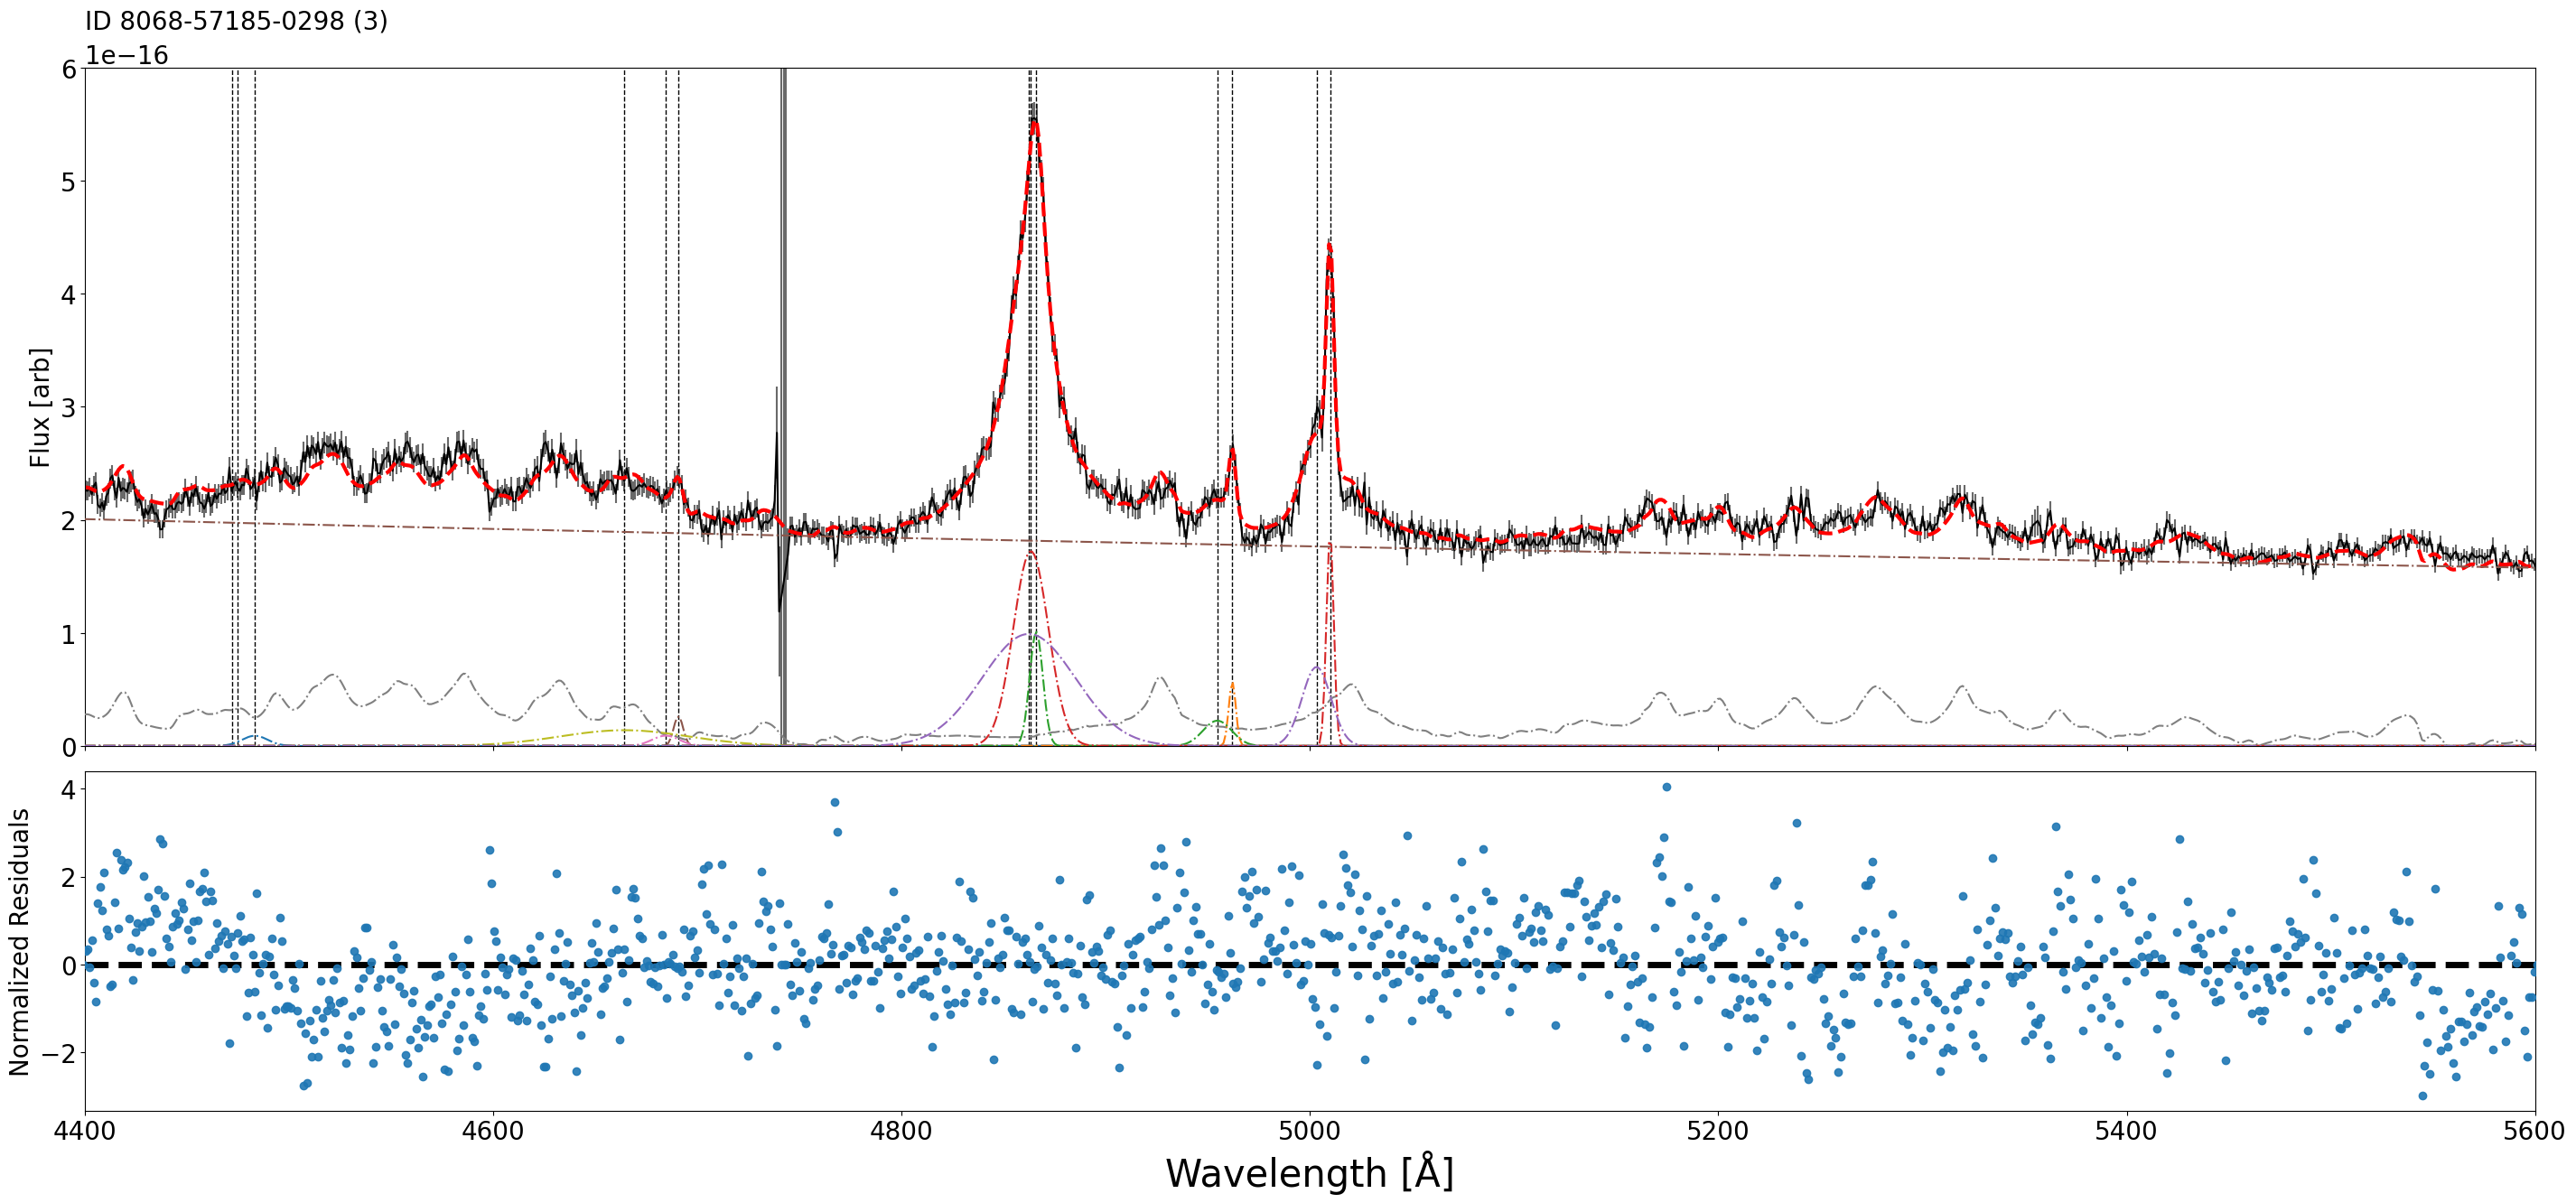

In [26]:
import yaml 
from pathlib import Path
from sheap.FunctionsMinimize.functions import gaussian_func
yaml_path = Path("../sheap/RegionHandler/LineRepository/feII_model.yaml")

# Open and load it
with open(yaml_path, "r") as file:
    data = yaml.safe_load(file)["region"]
amplitudes = jnp.array([i.get("amplitude") for i in data])
centers = jnp.array([i.get("center") for i in data])
x = jnp.linspace(3500,11000,1000)
sums = jnp.sum(jnp.array([gaussian_func(x,jnp.array([amplitude,center,20])) for amplitude,center in zip(amplitudes,centers)]),axis=0)

In [28]:
amplitudes,centers = jnp.array([[i.get("amplitude"),i.get("center")] for i in data]).T

In [30]:
centers

Array([ 3720.174,  3779.576,  3798.597,  3833.013,  3896.103,  4075.954,
        4119.524,  4124.787,  4177.692,  4183.2  ,  4258.34 ,  5197.577,
        5234.625,  5254.929,  5264.812,  5276.002,  5316.615,  5316.784,
        5325.553,  5337.732,  5362.869,  5414.073,  5425.257,  5932.055,
        5991.376,  6084.111,  6113.322,  6116.057,  6129.703,  6150.098,
        4278.159,  4314.31 ,  4332.881,  4338.703,  4372.222,  4384.319,
        4413.601,  4825.736,  4833.197,  4839.998,  4593.827,  4601.378,
        4656.981,  4663.708,  4731.453,  4923.927,  5018.44 ,  5169.033,
        5256.938,  5284.109,  6369.462,  6432.68 ,  6516.08 ,  5432.967,
        5525.125,  5534.847,  5591.368,  6269.967,  6147.741,  6149.258,
        6238.392,  6239.953,  6247.557,  6407.251,  6416.919,  6456.383,
        7181.232,  7222.394,  7224.487,  7289.045,  7301.56 ,  7308.073,
        7310.216,  7320.654,  7352.699,  7449.335,  7462.407,  7479.693,
        7515.831,  7533.367,  7655.488,  7711.723, 

In [ ]:
region_plot = SheapPlot(sheapclass)
n = 16
region_plot.plot(n,add_name=False)#207

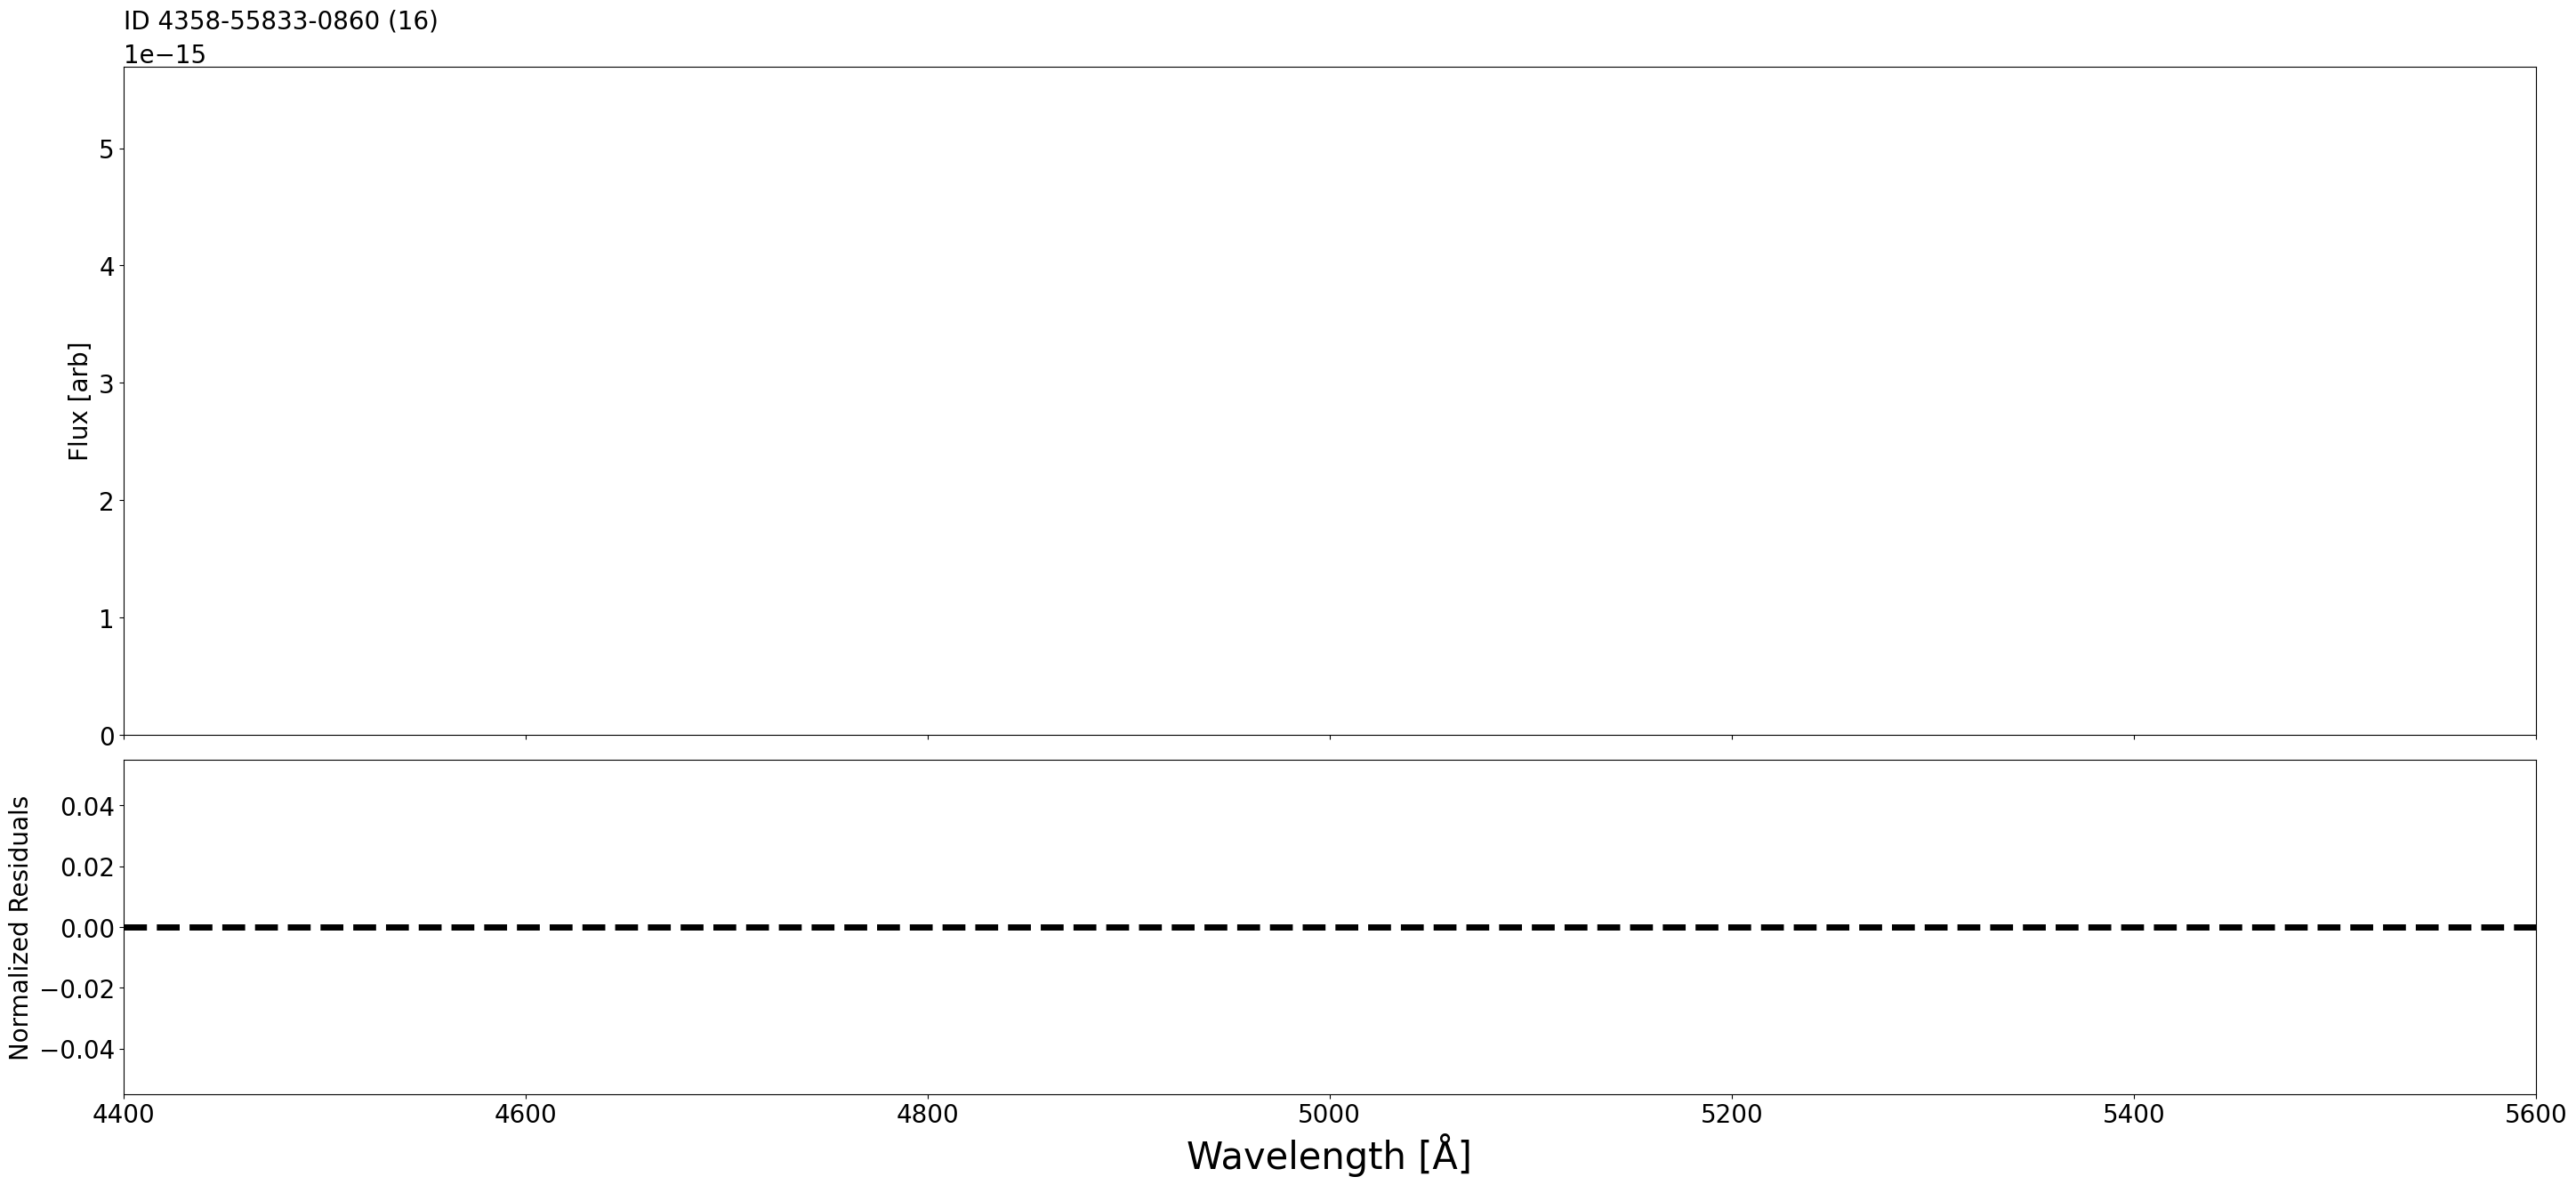

In [11]:
sheapclass.profile_params_index_list

[array([0, 1, 2]),
 array([3, 4, 5]),
 array([6, 7, 8]),
 array([ 9, 10, 11]),
 array([12, 13, 14]),
 array([15, 16, 17]),
 array([18, 19, 20]),
 array([21, 22, 23]),
 array([24, 25, 26]),
 array([27, 28, 29]),
 array([30, 31, 32]),
 array([33, 34, 35]),
 array([36, 37, 38]),
 array([39, 40, 41]),
 array([42, 43])]

In [30]:
parameters = ParameterEstimation(sheapclass)

here will came the combination


In [73]:
parameters.compute_black_hole_mass()["Hbeta"][0]

Array(79493718.93172939, dtype=float64)

In [76]:
hbeta = parameters.compute_black_hole_mass()
#lambda0 = hbeta["center"]
#params = hbeta["params"]
#idx_widhts = [idx for idx,_  in enumerate(hbeta.get("params_names")) if "width" in _]
#fwhm = 2. * jnp.sqrt(2. * jnp.log(2.)) * params[:,idx_widhts]
#fwhm_kms = (fwhm/jnp.array(lambda0))*c
#[idx for idx,_  in enumerate(hbeta) if "center" in _]

In [14]:
parameters.linemap._get(["line_name","kind","line_name"],["Hbeta","narrow","HeIId"],logic="or")

{'idx': [1, 3, 5, 6, 7, 8, 11, 12, 13],
 'line_name': array(['OIIIb', 'OIIIc', 'HeIId', 'HeIId', 'HeIId', 'HeId', 'Hbeta',
        'Hbeta', 'Hbeta'], dtype='<U8'),
 'region': ['narrow_basic',
  'narrow_basic',
  'helium',
  'helium',
  'helium',
  'helium',
  'hydrogen',
  'hydrogen',
  'hydrogen'],
 'center': [4958.896072,
  5006.803341,
  4685.71,
  4685.71,
  4685.71,
  4471.479,
  4861.333,
  4861.333,
  4861.333],
 'kind': ['narrow',
  'narrow',
  'narrow',
  'broad',
  'broad',
  'narrow',
  'narrow',
  'broad',
  'broad'],
 'original_centers': array([4958.896072, 5006.803341, 4685.71    , 4685.71    , 4685.71    ,
        4471.479   , 4861.333   , 4861.333   , 4861.333   ]),
 'component': [1, 1, 1, 1, 2, 1, 1, 1, 2],
 'entries': [SpectralLine(center=4958.896072, line_name='OIIIb', kind='narrow', component=1, amplitude=1.0, how=None, region='narrow_basic', profile='gaussian', which=None),
  SpectralLine(center=5006.803341, line_name='OIIIc', kind='narrow', component=1, amplitude=

In [17]:
broad_params = parameters.broad_params
narrow_params = parameters._narrow_params #using only the lines that have a conterpart broad, what happend in the cases in where this dosent 
n_broad = parameters.n_broad

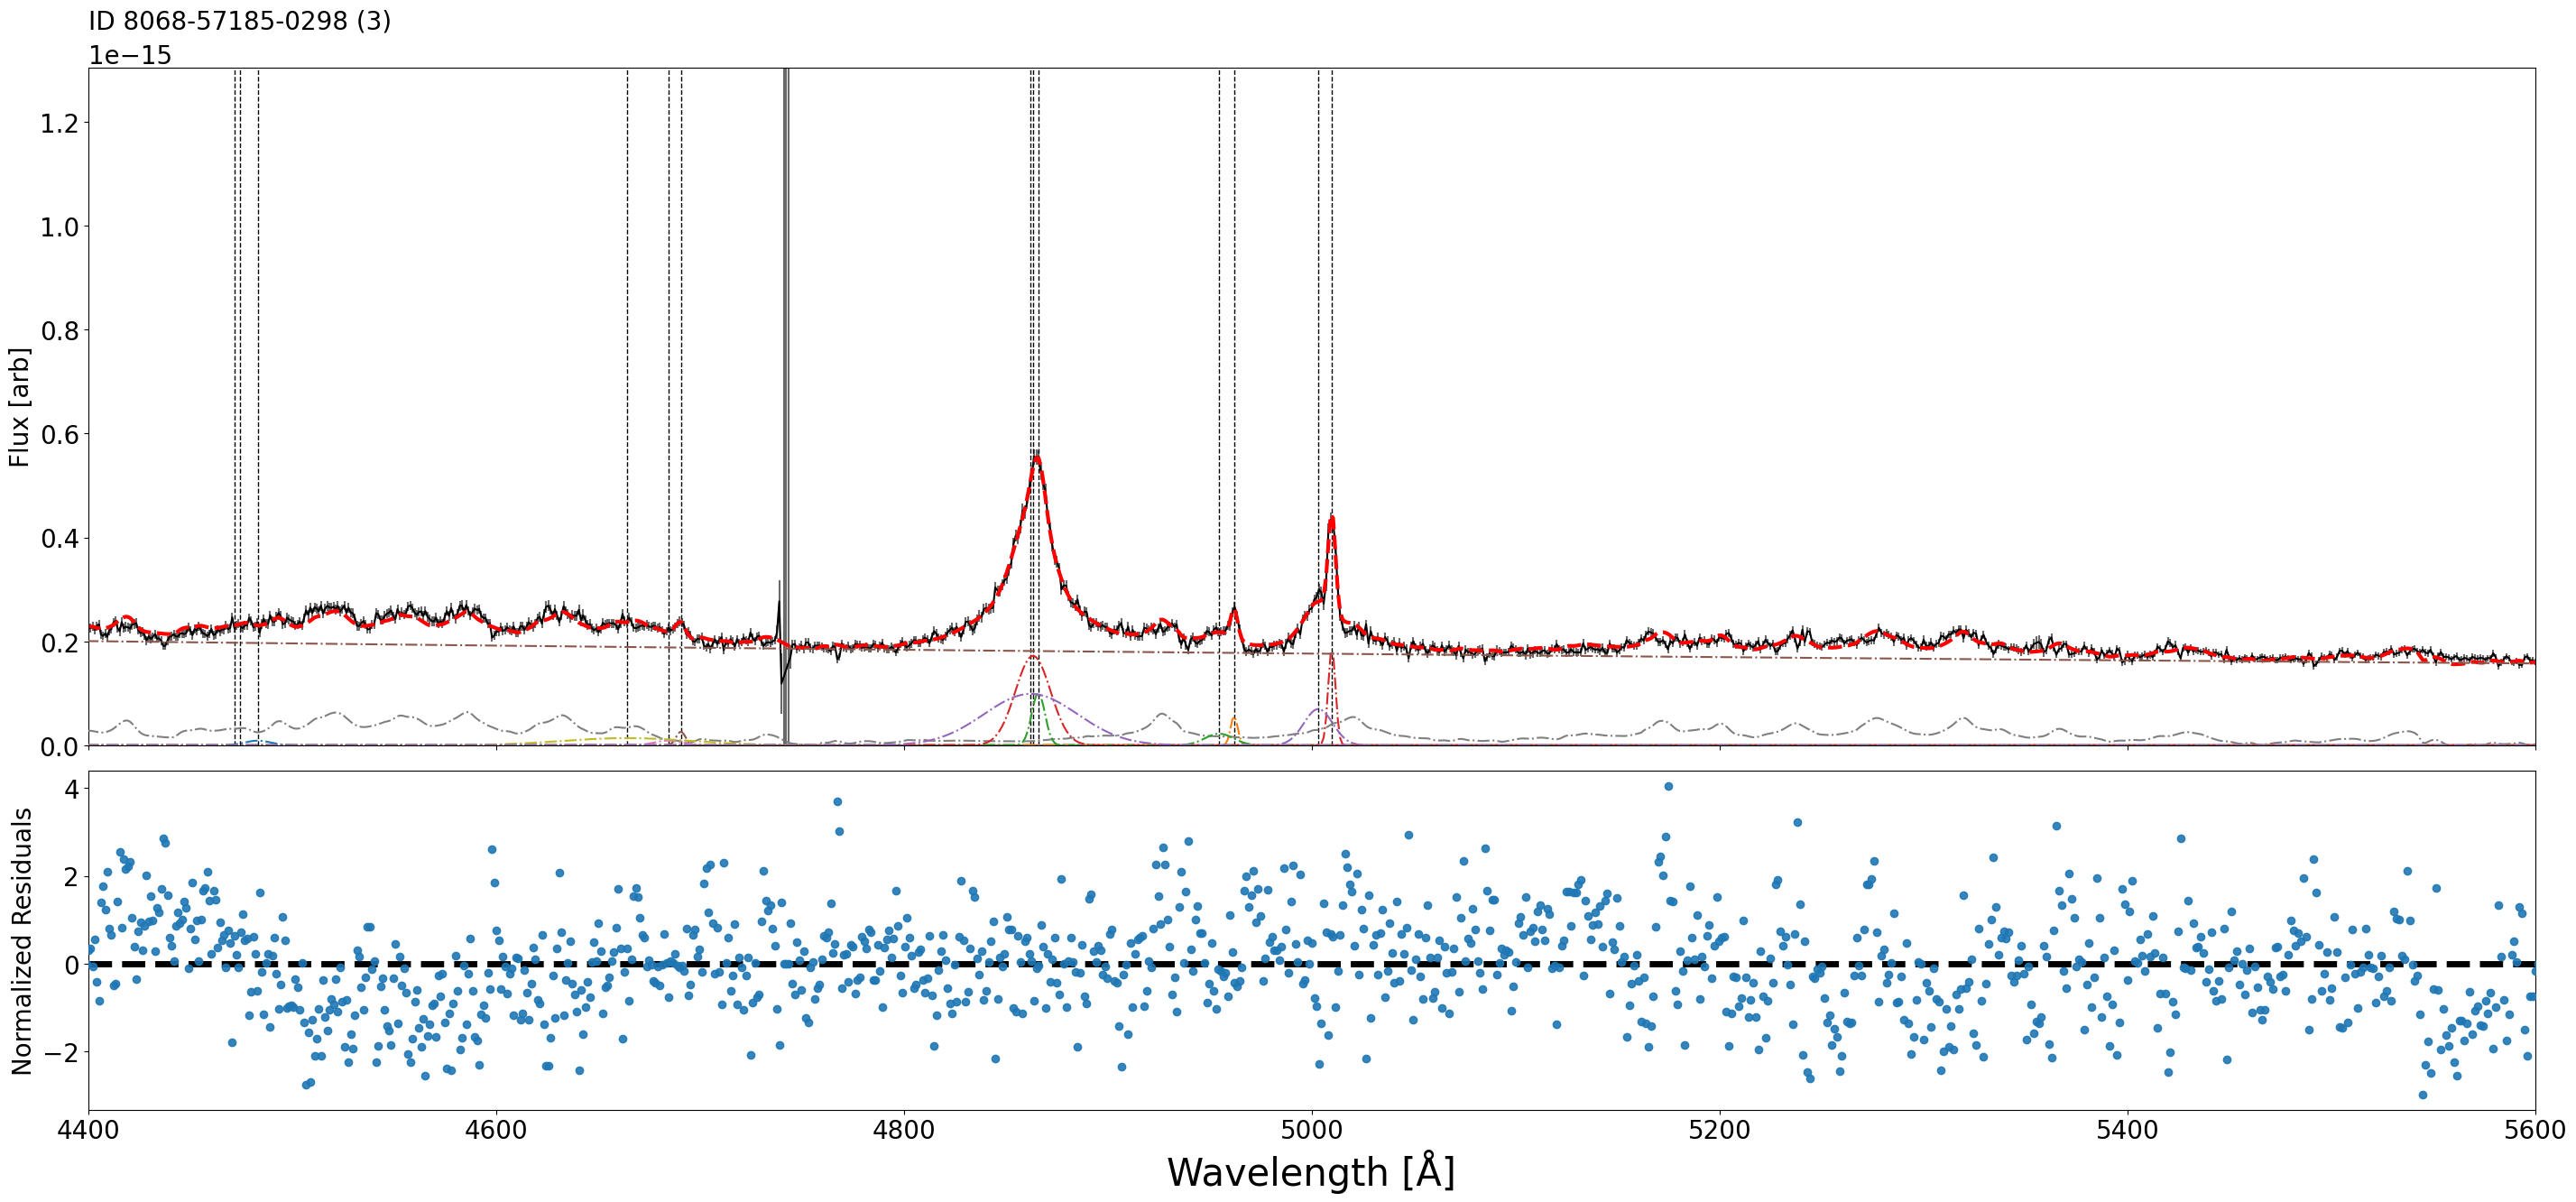

In [18]:
region_plot.plot(3,add_name=False)#207

In [ ]:
# def effective_fwhm(params1,params2):
#     """
#     Estimate the FWHM of a combined two-Gaussian profile using moment analysis.
    
#     params: tuple or array-like with 6 elements:
#         (amp1, mu1, sigma1, amp2, mu2, sigma2)
#     Returns:
#         Effective FWHM computed as 2*sqrt(2*ln2)*sigma_eff.
#     """
#     amp1, mu1, sigma1, = params1
#     amp2, mu2, sigma2 = params2 
#     #print(mu1,mu2)
#     # Compute the effective mean
#     total_amp = amp1 + amp2
#     mu_eff = (amp1 * mu1 + amp2 * mu2) / total_amp

#     # Compute the effective variance (includes the variance from the spread of the means)
#     var_eff = (amp1 * (sigma1**2 + (mu1 - mu_eff)**2) +
#                amp2 * (sigma2**2 + (mu2 - mu_eff)**2)) / total_amp

#     sigma_eff = jnp.sqrt(var_eff)
#     fwhm = 2.35482 * sigma_eff
#     return fwhm/mu_eff

In [171]:
params1 = reshaped[:, :, 0, :]  # (225, 3, 3)
params2 = reshaped[:, :, 1, :]  # (225, 3, 3)

In [174]:
reshaped=broad_params["params"].reshape(broad_params["params"].shape[0],len(broad_params["line_name"]),-1).reshape(broad_params["params"].shape[0],3,2,3)
batched_fwhm = jax.vmap(
    jax.vmap(effective_fwhm, in_axes=(0, 0)),  # over regions
    in_axes=(0, 0)  # over samples
)
result_psf = batched_fwhm(params1, params2)

In [183]:
c=299792
limit_velocity = 150
params_broad = broad_params.get("params")
params_narrow = narrow_params.get("params")
#index_params_broad = broad_params.get("profile_params_index_flat")
#params_broad = params_broad.reshape(params_broad.shape[0],-1,n_broad)
reshaped=broad_params["params"].reshape(broad_params["params"].shape[0],len(broad_params["line_name"]),-1).reshape(broad_params["params"].shape[0],3,n_broad,3)
batched_fwhm = jax.vmap(
    jax.vmap(effective_fwhm, in_axes=(0, 0)),  # over regions
    in_axes=(0, 0)  # over samples
)
psf_comb = batched_fwhm(params1, params2)

center_broad = params_broad[:,1::3].reshape(params_broad.shape[0],-1,n_broad)#this is done assuming all the lines have a distribution with 3 parameters if some day its is not true any more will be necesary took parameter by parameter
amplitude_broad = params_broad[:,0::3].reshape(params_broad.shape[0],-1,n_broad)
width_broad = params_broad[:,2::3].reshape(params_broad.shape[0],-1,n_broad)
center_narrow =  params_narrow[:,1::3]
delta_center = (center_broad - center_narrow[:,:,None])/center_narrow[:,:,None]
relative_velocity = jnp.squeeze((abs(jnp.diff(delta_center,axis=2))*c))
mask = relative_velocity>=limit_velocity #if they are virializie between the two
args_min = jnp.argmin(abs(delta_center),axis=2)
psfs_nonvirial = jnp.take_along_axis(((width_broad*2.35482/center_broad)), args_min[..., jnp.newaxis], axis=2).squeeze(axis=2) # psf of the one virialize to the narrow component for proxy
amplitudes_ratios = jnp.nanmin(amplitude_broad,axis=2)/jnp.nanmax(amplitude_broad,axis=2)
arg_amp_max = jnp.argmax(amplitude_broad,axis=2)
mask_amplitudes = amplitudes_ratios > 0.1
psfs_nonvirial_amplitudes = jnp.take_along_axis(((width_broad*2.35482/center_broad)), arg_amp_max[..., jnp.newaxis], axis=2).squeeze(axis=2)
psfs_amplitudes = jnp.where(mask_amplitudes,psf_comb,psfs_nonvirial_amplitudes) #if amplitde ratios>combine else 
psf_final = jnp.where(mask,psfs_nonvirial,psfs_amplitudes)*c
#FWHM_non_virialized = jnp.where(mask,0,(width_broad*2.35482/center_broad[:,1])[None,args_min])
#params_non_virialized[:,2]*2.35482/params_non_virialized[:,1]
#non_virialized_index = jnp.where(relative_velocity>=limit_velocity)

In [ ]:
#force_combined =

In [180]:
psf_final

Array([[0.02283321, 0.01069522, 0.01128393],
       [0.02086028, 0.01975037, 0.01289328],
       [0.01893726, 0.01717674, 0.01506468],
       [0.00333923, 0.0110145 , 0.00747772],
       [0.01386476, 0.01289421, 0.01200801],
       [0.01558326, 0.01436084, 0.01643434],
       [0.00479506, 0.00502458, 0.01164743],
       [0.00668231, 0.0036401 , 0.00988183],
       [0.01318722, 0.01265957, 0.01258304],
       [0.01022375, 0.01077418, 0.00992143],
       [0.00401838, 0.00422666, 0.01541779],
       [0.00840582, 0.01199249, 0.01175117],
       [0.0064283 , 0.00650914, 0.01188591],
       [       nan,        nan,        nan],
       [0.0091247 , 0.01321069, 0.00951449],
       [0.0138642 , 0.01452276, 0.01367774],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan],
       [0.01977406, 0.01738444, 0.00819608],
       [0.00350396, 0.00367202, 0.00337725],
       [       nan,        nan,        nan],
       [0.

In [84]:
#argmin_center = jnp.argmin(abs(delta_center[non_virialized_index]),axis=1).ravel()

In [83]:
psfs_amplitudes

Array([[0.        , 0.26357321, 0.11782428],
       [0.        , 0.        , 0.70537647],
       [0.62656768, 0.        , 0.        ],
       [0.6554793 , 0.        , 0.57506929],
       [0.        , 0.        , 0.25815663],
       [0.78486844, 0.        , 0.95518483],
       [0.        , 0.        , 0.67663868],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.22443245],
       [0.        , 0.        , 0.83893911],
       [0.        , 0.        , 0.24419542],
       [0.        , 0.        , 0.79630533],
       [0.85792159, 0.        , 0.9093317 ],
       [0.        , 0.        , 0.        ],
       [0.24539071, 0.        , 0.82112739],
       [0.        , 0.        , 0.5406747 ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.54948055],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.

In [85]:
#result = np.divide(arr[..., 0], arr[..., 1], out=np.zeros_like(arr[..., 0]), where=arr[..., 1] != 0)


In [86]:
#jnp.divide(amplitude_broad)

In [23]:
#params_non_virialized = params_region[jnp.ix_(non_virialized_index, index_params_broad)]

In [ ]:
# def calculate_FWHM(region_class,line,params_region,limit_velocity=150,limit_ratio=0.1,broad_number=2,c=299792):
#     """
#     TODO ERRORS 
#     TODO bugs in some systems 
#     Depende, si es para calcular la masa del agujero negro debes considerar lo siguiente:
#     - si la diferencia en velocidad entre las dos componentes es importante (>150km/s), solo usa la que está en la más cercana a la velocidad de las narrow
#     - si las dos están en la misma o similar velocidad, y el flujo de la menos intensa es por lo menos >10% de la más intensa, ajusta las dos componentes como una sola gaussiana y usa ese FWHM. En caso de que el flujo sea  <10%, solo usa el FWHM de la más intensa
#     """
#     index_params_broad = region_class.mapping_params(["broad",line])
#     index_center_broad = region_class.mapping_params(["center","broad"])
#     index_amplitude_broad = region_class.mapping_params(["amplitude","broad",line])
#     index_center_narrow =region_class.mapping_params(["center","narrow",line])
#     delta_center = ((params_region[:,index_center_broad] - params_region[:,index_center_narrow].ravel()[:,None])/params_region[:,index_center_narrow].ravel()[:,None])
#     relative_velocity = abs(jnp.diff(delta_center,axis=1).ravel())*c
#     non_virialized_index = jnp.where(relative_velocity>=limit_velocity)[0]
#     virialized_index = jnp.where(relative_velocity<limit_velocity)[0]
#     #####
#     params_non_virialized = params_region[jnp.ix_(non_virialized_index, index_params_broad)]
#     params_non_virialized = params_non_virialized.reshape(params_non_virialized.shape[0], broad_number, -1)
#     argmin_center = jnp.argmin(abs(delta_center[non_virialized_index]),axis=1).ravel()
#     row_indices = jnp.arange(argmin_center.shape[0])
#     params_non_virialized = params_non_virialized[row_indices,argmin_center]
#     FWHM_non_virialized = params_non_virialized[:,2]*2.35482/params_non_virialized[:,1] # here is assume the position of sigma
#     params_amplitude_virialized = params_region[jnp.ix_(virialized_index, index_amplitude_broad)]
#     argmax = jnp.argmax(params_amplitude_virialized,axis=1).ravel()
#     argmin = jnp.argmin(params_amplitude_virialized,axis=1).ravel()
#     row_indices = jnp.arange(params_amplitude_virialized.shape[0])
#     max_vals = params_amplitude_virialized[row_indices, argmax]
#     min_vals = params_amplitude_virialized[row_indices, argmin]
#     ratio = min_vals / max_vals
#     print(jnp.where(jnp.isnan(ratio)))
#     #index_to_comb = jnp.where(ratio>limit_ratio)[0]
#     params_virialized = params_region[jnp.ix_(virialized_index, index_params_broad)]
#     params_virialized_r = params_virialized.reshape(params_virialized.shape[0], broad_number, -1)
#     params_virialized_r = params_virialized_r[row_indices,argmax]    
#     FWHM_virialized = jnp.where(ratio>limit_ratio,effective_fwhm(params_virialized.T),params_virialized_r[:,2]*2.35482/params_virialized_r[:,1])    
#     #FWHM_virialized = jnp.where(jnp.isnan(ratio>limit_ratio),0,FWHM_virialized)  
#     FWHM = jnp.zeros_like(relative_velocity)
#     FWHM = FWHM.at[non_virialized_index].set(FWHM_non_virialized)
#     FWHM = FWHM.at[virialized_index].set(FWHM_virialized)
#     return FWHM*c

# def effective_fwhm(params):
#     """
#     Estimate the FWHM of a combined two-Gaussian profile using moment analysis.
    
#     params: tuple or array-like with 6 elements:
#         (amp1, mu1, sigma1, amp2, mu2, sigma2)
#     Returns:
#         Effective FWHM computed as 2*sqrt(2*ln2)*sigma_eff.
#     """
#     amp1, mu1, sigma1, amp2, mu2, sigma2 = params

#     # Compute the effective mean
#     total_amp = amp1 + amp2
#     mu_eff = (amp1 * mu1 + amp2 * mu2) / total_amp

#     # Compute the effective variance (includes the variance from the spread of the means)
#     var_eff = (amp1 * (sigma1**2 + (mu1 - mu_eff)**2) +
#                amp2 * (sigma2**2 + (mu2 - mu_eff)**2)) / total_amp

#     sigma_eff = jnp.sqrt(var_eff)
#     fwhm = 2.35482 * sigma_eff
#     return fwhm/mu_eff

['fitFeOP',
 'gaussian',
 'gaussian',
 'gaussian',
 'gaussian',
 'gaussian',
 'gaussian',
 'gaussian',
 'gaussian',
 'gaussian',
 'gaussian',
 'gaussian',
 'gaussian',
 'gaussian',
 'powerlaw']

In [50]:
parameters.linemap.profile_params_index_list

[array([0, 1, 2]),
 array([3, 4, 5]),
 array([6, 7, 8]),
 array([ 9, 10, 11]),
 array([12, 13, 14]),
 array([15, 16, 17]),
 array([18, 19, 20]),
 array([21, 22, 23]),
 array([24, 25, 26]),
 array([27, 28, 29]),
 array([30, 31, 32]),
 array([33, 34, 35]),
 array([36, 37, 38]),
 array([39, 40, 41]),
 array([42, 43])]

In [51]:
parameters.linemap._get(["line_name","kind"],["Hbeta","broad"])

line_name Hbeta
kind broad


{'idx': [12, 13],
 'line_name': array(['Hbeta', 'Hbeta'], dtype='<U8'),
 'region': ['hydrogen', 'hydrogen'],
 'center': [4861.333, 4861.333],
 'kind': ['broad', 'broad'],
 'original_centers': array([4861.333, 4861.333]),
 'component': [1, 2],
 'entries': [SpectralLine(center=4861.333, line_name='Hbeta', kind='broad', component=1, amplitude=1.0, how=None, region='hydrogen', profile='gaussian', which=None),
  SpectralLine(center=4861.333, line_name='Hbeta', kind='broad', component=2, amplitude=0.5, how=None, region='hydrogen', profile='gaussian', which=None)],
 'profile_functions': array([<PjitFunction of <function gaussian_func at 0x73072c9c8860>>,
        <PjitFunction of <function gaussian_func at 0x73072c9c8860>>],
       dtype=object),
 'profile_names': array(['gaussian', 'gaussian'], dtype='<U8'),
 'profile_params_index_flat': array([36, 37, 38, 39, 40, 41]),
 'profile_params_index_list': array([array([36, 37, 38]), array([39, 40, 41])], dtype=object),
 'params_names': array(['ampl

In [112]:
parameters.linemap.m

[array([False, False, False, False, False, False, False, False, False,
        False, False,  True,  True,  True, False]),
 array([False, False, False, False, False, False,  True,  True, False,
         True,  True, False,  True,  True, False])]

### other stuff

In [226]:
#file_paths,objs_panda  = cross_pandas_spectra(path_dr16,"sdss_fits","dr16_pandas.csv")
#objs_panda_sort =objs_panda
from astropy.io import fits 
file_paths,objs_panda = cross_pandas_spectra(path_dr16,"new_sub_sample_sdss_fits","subsample_07_03_25_full.csv")
n_pixels = [fits.open(i)[1].header["NAXIS2"] for i in objs_panda.fit_path.values]
objs_panda["NAXIS2"] = n_pixels
#objs_panda_sort = objs_panda[objs_panda.NAXIS2 == 4636 & objs_panda.Z_FIT<1.0]#.sort_values("SN_MEDIAN_ALL",ascending=False)#[:1500][:100][:10]
#objs_panda_sort = objs_panda_sort.reset_index(drop=True)

You cross match found 11538


In [60]:
#test2 = Sheapectral.from_pickle("/home/favila/smbh_mass/sheap/notebooks/first_save.pkl")

In [7]:
list(objs_panda.sort_values("SN_MEDIAN_ALL",ascending=False).NAXIS2)

[3822,
 3824,
 3844,
 3758,
 4594,
 4600,
 4591,
 4595,
 4615,
 3845,
 3829,
 4617,
 4590,
 4612,
 3837,
 4591,
 4617,
 4612,
 4594,
 3844,
 4609,
 4618,
 4618,
 3836,
 4587,
 4614,
 4585,
 4577,
 4613,
 4613,
 3836,
 4582,
 4578,
 3841,
 4622,
 4607,
 4605,
 4601,
 4580,
 3819,
 4613,
 4577,
 3844,
 4603,
 3842,
 3800,
 3842,
 3843,
 4614,
 4628,
 4613,
 3828,
 3825,
 4601,
 4591,
 4579,
 4586,
 4623,
 4628,
 4590,
 4602,
 3834,
 4573,
 4606,
 4639,
 4623,
 3837,
 3816,
 4586,
 4589,
 4585,
 4605,
 4569,
 4605,
 4628,
 4577,
 4606,
 4571,
 3841,
 4595,
 3804,
 3805,
 4594,
 3846,
 4587,
 4581,
 4601,
 4600,
 4626,
 3830,
 4602,
 4615,
 4586,
 4623,
 4623,
 3807,
 4595,
 3847,
 4606,
 4596,
 3837,
 4602,
 3833,
 4625,
 4575,
 3846,
 3847,
 3843,
 4612,
 3809,
 4601,
 3822,
 4609,
 3842,
 4579,
 3843,
 3843,
 4584,
 4604,
 4603,
 3844,
 4580,
 4597,
 2918,
 3838,
 3832,
 3836,
 3829,
 3813,
 3659,
 3826,
 4587,
 4613,
 4581,
 4582,
 4620,
 3817,
 4585,
 4580,
 3826,
 4629,
 4602,
 3824,

In [230]:
objs_panda_sort.Z_FIT.values

array([0.12855373, 0.13077047, 0.29170832, 0.17658962, 0.18791476,
       0.34497082, 0.12362484, 0.29303738, 0.675     , 0.24310841,
       0.51585561, 0.291     , 0.69370383, 1.37333703, 0.44761947,
       0.42948982, 2.471     , 2.854     , 2.415     , 0.50376374,
       0.25      , 1.52125001, 0.30465642, 1.06088138, 2.76      ,
       2.465     , 1.55224669, 0.2690841 , 0.34866694, 0.575     ,
       0.48288369, 1.28866208, 2.88635564, 0.529     , 1.16147685,
       0.592     , 0.804     , 2.69      , 0.4649311 , 1.26877069,
       1.303     , 1.996     , 2.311     , 0.43337467, 1.577     ,
       0.5609051 , 1.44421804, 0.59662944, 1.44631195, 0.3846544 ,
       0.34181157, 1.35263801, 1.75014758, 2.97760844, 1.12930202,
       0.47359726, 2.257     , 1.94042134, 0.94000119, 0.49156079,
       2.206     , 2.237     , 0.44559258, 0.683     , 2.95      ,
       2.595     , 0.77879483, 1.36258674, 2.77315164, 0.56462866,
       1.22482181, 1.4091301 , 2.606     , 0.92975903, 1.77487

In [281]:
objs_panda_sort = objs_panda[(objs_panda.NAXIS2 == 4590)].sort_values("SN_MEDIAN_ALL",ascending=False)

In [9]:
import numpy as np 
{key: [np.median(objs_panda[objs_panda.NAXIS2==key]["SN_MEDIAN_ALL"].values),value] for key,value in objs_panda.value_counts("NAXIS2").to_dict().items()}

{4590: [np.float64(2.8709263801574707), 236],
 4614: [np.float64(2.9958181381225586), 225],
 4615: [np.float64(3.247713804244995), 225],
 4613: [np.float64(2.87721049785614), 218],
 4588: [np.float64(3.0799492597579956), 210],
 4589: [np.float64(2.9392731189727783), 209],
 4605: [np.float64(2.890620231628418), 207],
 4594: [np.float64(2.9391292333602905), 202],
 4617: [np.float64(3.22165846824646), 201],
 4592: [np.float64(2.8729822635650635), 197],
 4591: [np.float64(3.0069925785064697), 193],
 4593: [np.float64(3.199700951576233), 192],
 4595: [np.float64(3.195770502090454), 190],
 4616: [np.float64(3.156723976135254), 187],
 4587: [np.float64(2.787569522857666), 185],
 4603: [np.float64(2.771456003189087), 185],
 4623: [np.float64(3.293220043182373), 184],
 4606: [np.float64(2.822915196418762), 182],
 4600: [np.float64(3.029001474380493), 181],
 4624: [np.float64(3.2299466133117676), 180],
 4602: [np.float64(3.090077519416809), 180],
 4625: [np.float64(2.7397093772888184), 179],
 46

In [10]:
objs_panda.value_counts("NAXIS2").to_dict()

{4590: 236,
 4614: 225,
 4615: 225,
 4613: 218,
 4588: 210,
 4589: 209,
 4605: 207,
 4594: 202,
 4617: 201,
 4592: 197,
 4591: 193,
 4593: 192,
 4595: 190,
 4616: 187,
 4587: 185,
 4603: 185,
 4623: 184,
 4606: 182,
 4600: 181,
 4624: 180,
 4602: 180,
 4625: 179,
 4604: 178,
 4630: 176,
 4583: 172,
 4601: 171,
 4628: 171,
 4612: 170,
 4596: 169,
 4611: 166,
 4599: 165,
 4598: 164,
 4618: 164,
 4620: 161,
 4629: 161,
 4626: 160,
 4631: 159,
 4621: 159,
 4607: 158,
 4627: 157,
 4586: 155,
 4584: 155,
 4622: 153,
 4608: 152,
 4632: 150,
 4619: 146,
 4610: 141,
 4597: 139,
 4582: 131,
 4585: 123,
 4609: 114,
 4581: 112,
 4633: 109,
 4580: 90,
 4636: 83,
 4634: 83,
 4579: 78,
 4635: 77,
 4638: 72,
 4639: 66,
 4576: 63,
 3841: 61,
 4577: 59,
 4637: 58,
 3842: 56,
 4573: 54,
 4578: 52,
 4570: 50,
 3843: 50,
 3838: 49,
 4571: 49,
 3837: 48,
 3840: 44,
 3835: 44,
 4572: 44,
 3829: 44,
 4640: 43,
 3845: 42,
 4575: 39,
 3844: 38,
 3836: 37,
 4568: 37,
 4574: 36,
 3834: 35,
 3833: 35,
 4569: 33,
 

In [274]:
objs_panda.columns

Index(['Unnamed: 0', 'SDSS_NAME', 'Z_DR16Q', 'FHOST_5100', 'Z_FIT', 'PLATE',
       'MJD', 'FIBERID', 'RA', 'DEC', 'EBV', 'IF_BOSS_SDSS', 'SN_MEDIAN_ALL',
       'LOGL5100', 'LOGL1350', 'LOGL1700', 'LOGL2500', 'LOGL3000', 'LOGLBOL',
       'LOGMBH_HB', 'LOGMBH_MGII', 'LOGMBH_CIV', 'LOGMBH', 'LOGLEDD_RATIO',
       'dr_name', 'fit_path', 'NAXIS2'],
      dtype='object')

In [275]:
objs_panda[objs_panda.fit_path=='/home/favila/smbh_mass/dr16/new_sub_sample_sdss_fits/8222-57431-0561.fits']

,Unnamed: 0,SDSS_NAME,Z_DR16Q,FHOST_5100,Z_FIT,PLATE,MJD,FIBERID,RA,DEC,...,LOGL3000,LOGLBOL,LOGMBH_HB,LOGMBH_MGII,LOGMBH_CIV,LOGMBH,LOGLEDD_RATIO,dr_name,fit_path,NAXIS2
6609,438486,124931.71+523039.1,0.161769,0.0,0.161769,8222,57431,561,192.382166,52.510867,...,0.0,45.315678,8.044651,0.0,0.0,8.044651,-0.842916,8222-57431-0561,/home/favila/smbh_mass/dr16/new_sub_sample_sds...,4590


**systems that will be use to test**
- Constins halpha hbeta power law '/home/favila/smbh_mass/dr16/new_sub_sample_sdss_fits/8222-57431-0561.fits'
- host dominated '/home/favila/smbh_mass/dr16/new_sub_sample_sdss_fits/8363-58140-0132.fits'

In [11]:
#objs_panda_sort.values[8]

In [12]:
objs_panda_sort.dr_name.values

array(['8760-57672-0398', '11321-58425-0980', '9399-58125-0786',
       '8068-57185-0298', '7718-57362-0337', '8755-58138-0842',
       '7734-58133-0522', '11346-58429-0693', '5200-56091-0874',
       '8490-57104-0102', '11554-58456-0826', '3839-55575-0754',
       '7640-57311-0416', '11654-58543-0787', '7893-57286-0111',
       '7653-57306-0064', '4358-55833-0860', '4212-55447-0644',
       '4310-55508-0576', '8301-57390-0046', '4033-55332-0548',
       '8404-57481-0054', '7678-57282-0014', '10262-58543-0654',
       '6004-56066-0736', '4224-55481-0753', '8491-57488-0094',
       '8524-57656-0324', '8489-57483-0320', '3925-55338-0038',
       '8058-57196-0479', '8433-57488-0216', '8294-57365-0190',
       '3857-55272-0812', '7410-57104-0114', '3851-55302-0678',
       '4266-55486-0590', '4377-55828-0854', '7893-57286-0352',
       '8760-57672-0286', '4377-55828-0630', '4209-55478-0592',
       '7286-57096-0376', '7642-57651-0431', '4994-55739-0698',
       '9143-57665-0256', '7824-572

In [13]:
#objs_panda.value_counts("NAXIS2")

In [14]:
# import numpy as np 
# def fits_reader_sdss(file):
#     """
#     Read an SDSS FITS file and extract wavelength, flux, and inverse variance,
#     scaled appropriately by the BUNIT header.
#     """
#     hdul = fits.open(file)
#     flux_scale = float(hdul[0].header["BUNIT"].split(" ")[0])
#     data_array = np.array([
#         10**hdul[1].data["loglam"],
#         hdul[1].data["flux"] * flux_scale,
#         flux_scale / np.sqrt(hdul[1].data["ivar"])
#     ])
#     header_array = np.array([
#         hdul[0].header["PLUG_RA"],
#         hdul[0].header["PLUG_DEC"]
#     ])
#     return data_array, header_array

In [15]:
# shapes = [fits_reader_sdss(file)[0].shape for file in objs_panda_sort.fit_path.values]

In [282]:
coords,spectra_reshaped,_ = parallel_reader(objs_panda_sort.fit_path.values)
coords = jnp.array(coords)
spectra_reshaped = jnp.array(spectra_reshaped)

/home/favila/smbh_mass/sheap/sheap/spectra_readers.py:22: RuntimeWarning: divide by zero encountered in divide
  flux_scale / np.sqrt(hdul[1].data["ivar"])
/home/favila/smbh_mass/sheap/sheap/spectra_readers.py:22: RuntimeWarning: divide by zero encountered in divide
  flux_scale / np.sqrt(hdul[1].data["ivar"])
/home/favila/smbh_mass/sheap/sheap/spectra_readers.py:22: RuntimeWarning: divide by zero encountered in divide
  flux_scale / np.sqrt(hdul[1].data["ivar"])
/home/favila/smbh_mass/sheap/sheap/spectra_readers.py:22: RuntimeWarning: divide by zero encountered in divide
  flux_scale / np.sqrt(hdul[1].data["ivar"])
/home/favila/smbh_mass/sheap/sheap/spectra_readers.py:22: RuntimeWarning: divide by zero encountered in divide
  flux_scale / np.sqrt(hdul[1].data["ivar"])
/home/favila/smbh_mass/sheap/sheap/spectra_readers.py:22: RuntimeWarning: divide by zero encountered in divide
  flux_scale / np.sqrt(hdul[1].data["ivar"])
/home/favila/smbh_mass/sheap/sheap/spectra_readers.py:22: Runtim

In [283]:
test_clase = Sheapectral(spectra_reshaped,z=objs_panda_sort["Z_DR16Q"].values,coords = coords,names = objs_panda_sort.dr_name.values)

extinction correction will be do it, change 'extinction_correction' to done if you want to avoid this step


redshift correction will be do it, change 'redshift_correction' to done if you want to avoid this step


<Axes: xlabel='Wavelength [Å]', ylabel='Flux [arb]'>

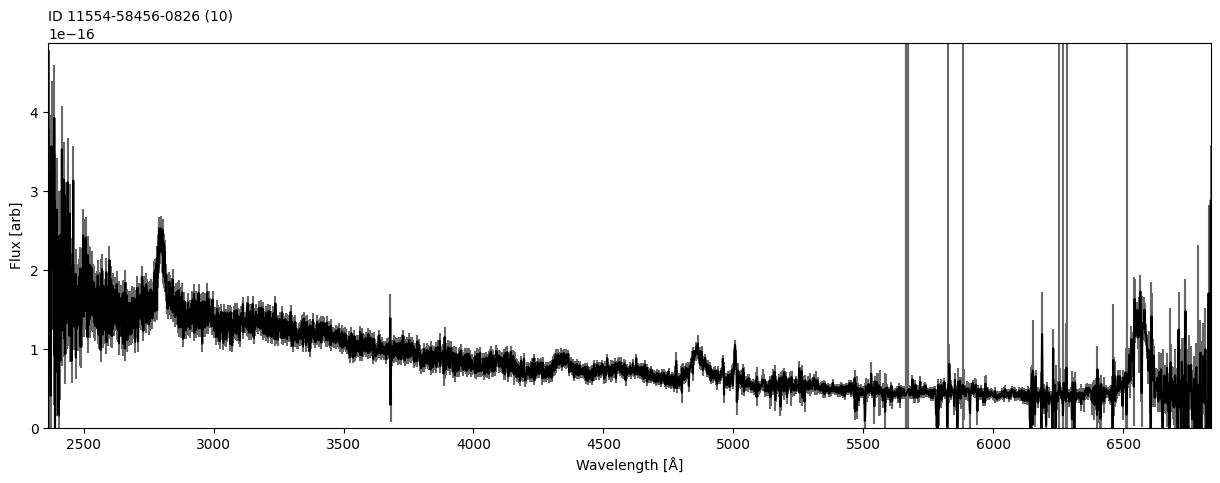

In [234]:
test_clase.quicklook(10)

In [284]:
test_clase.build_region(4500, 7200,fe_mode="template",n_broad=2,add_outflow=True,by_region=True,force_linear=False,add_balmercontiniumm=False)

added OP template


In [285]:
test_clase.fit_region()

Fitting 236 spectra
STEP1
learning_rate: 0.1 num_steps: 3000 non_optimize_in_axis: 3
STEP2
learning_rate: 0.01 num_steps: 3000 non_optimize_in_axis: 4


In [256]:
test_clase.z[10]

Array(0.51585561, dtype=float64)

In [257]:
jnp.where((test_clase.z < 0.8) & (test_clase.z > 0.5))

(Array([  8,  10,  12,  19,  29,  33,  35,  45,  47,  63,  66,  69,  85,
         98, 110, 120, 124, 125, 130, 142, 144, 146, 163, 170, 174, 200],      dtype=int64),)

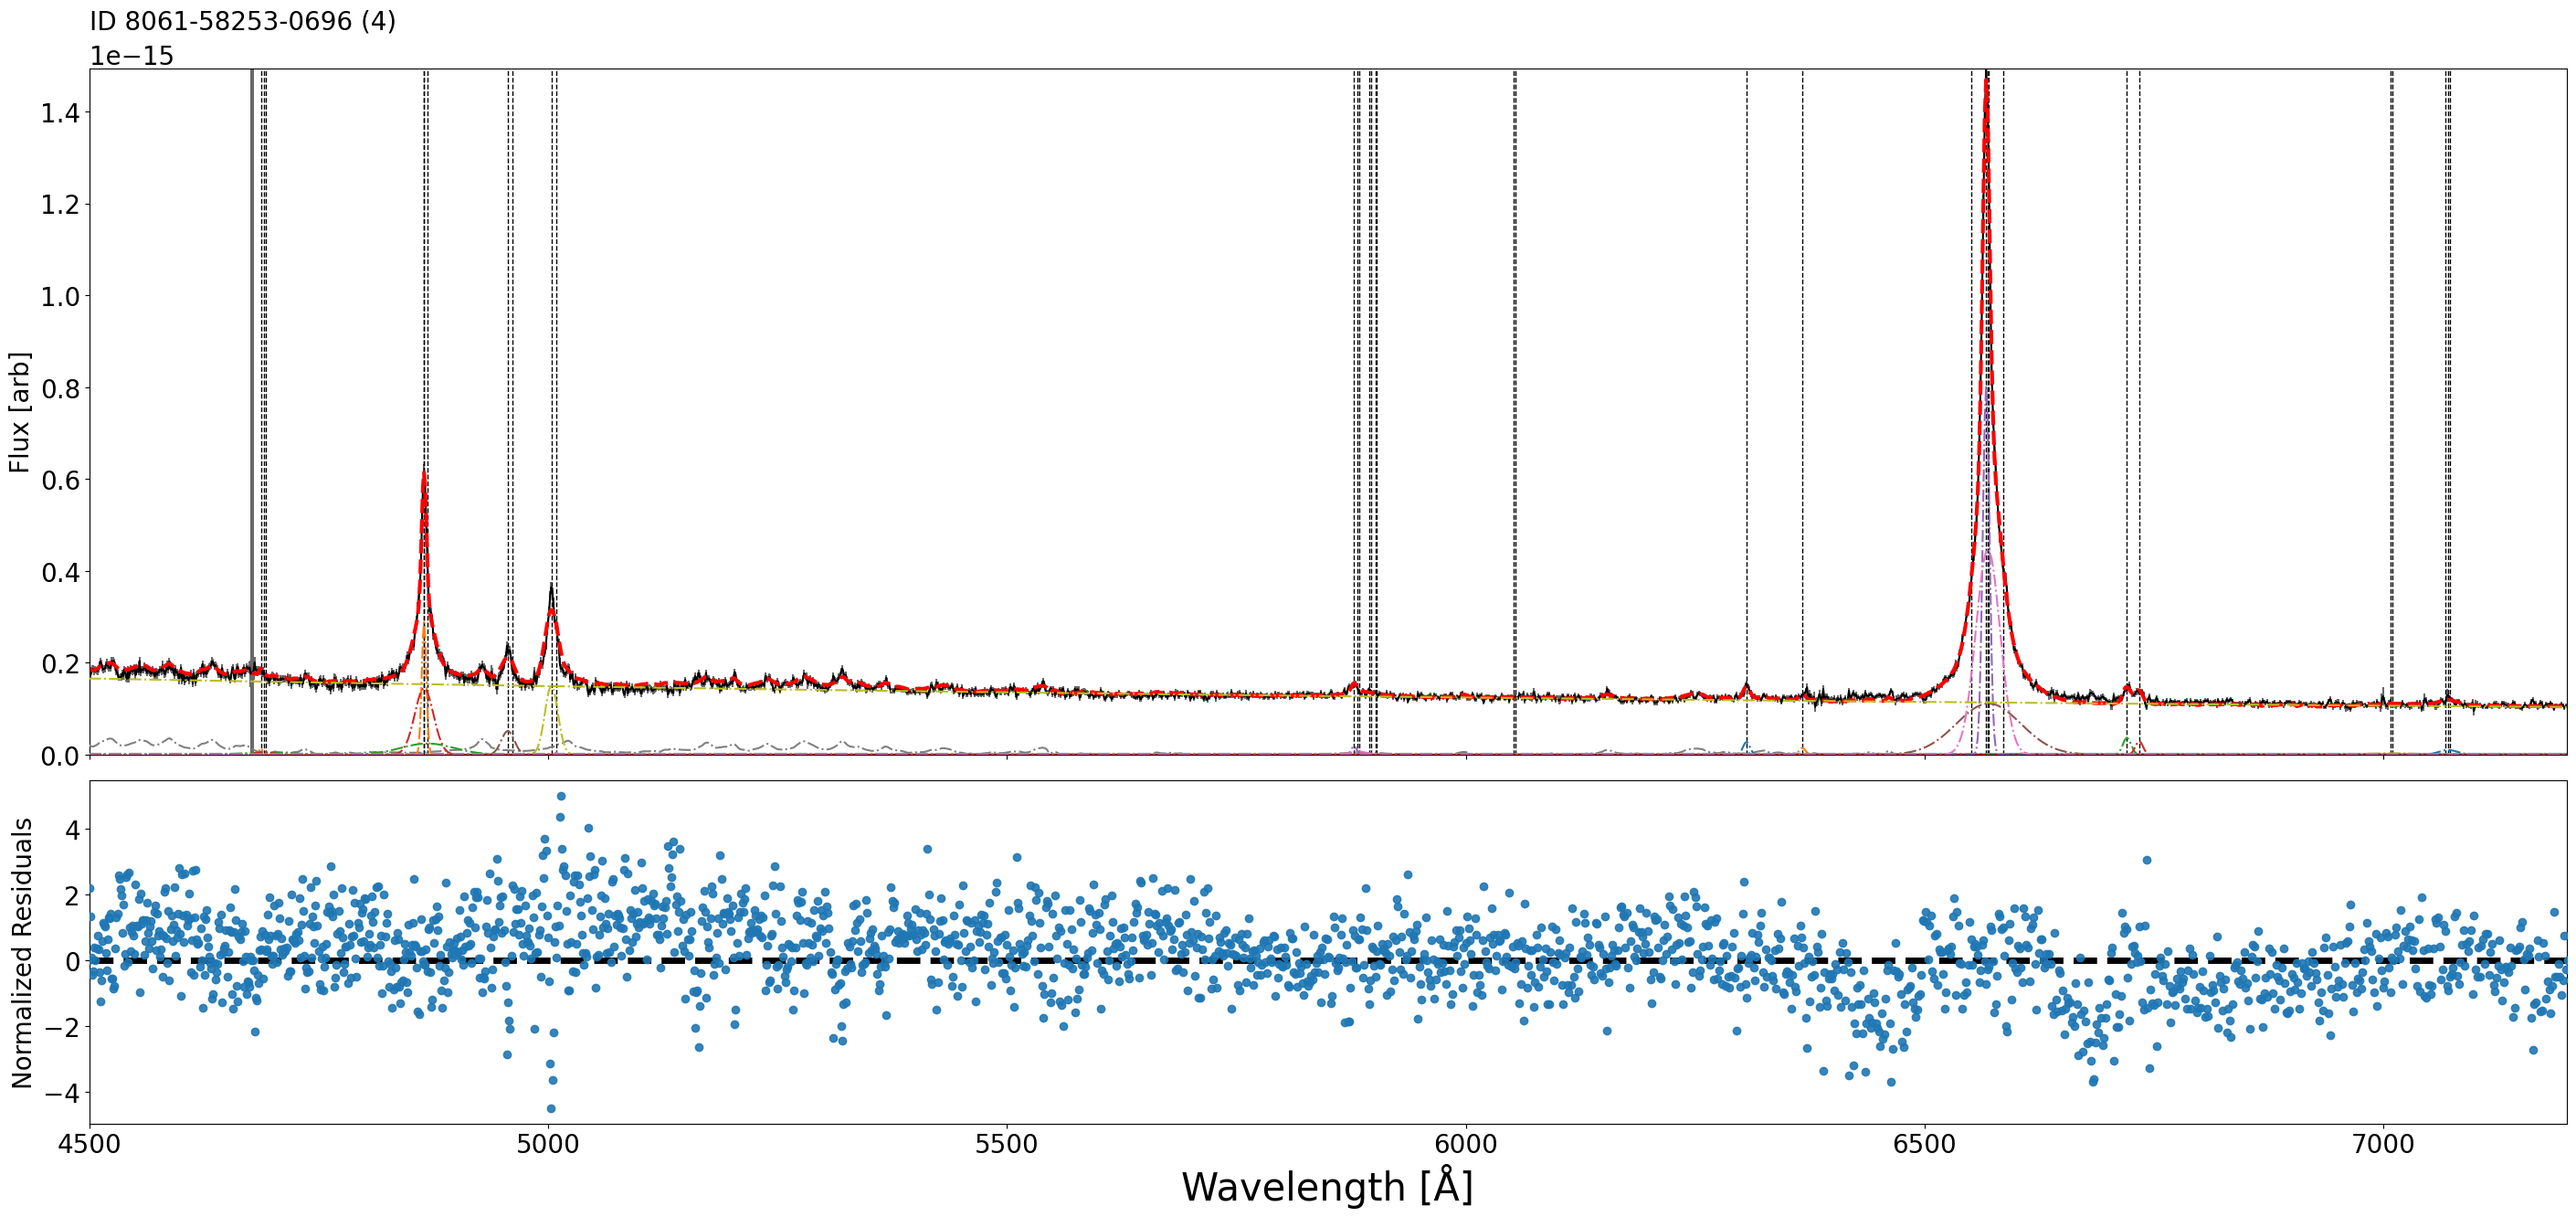

In [308]:
region_plot = SheapPlot(test_clase)
n = 4
region_plot.plot(n)

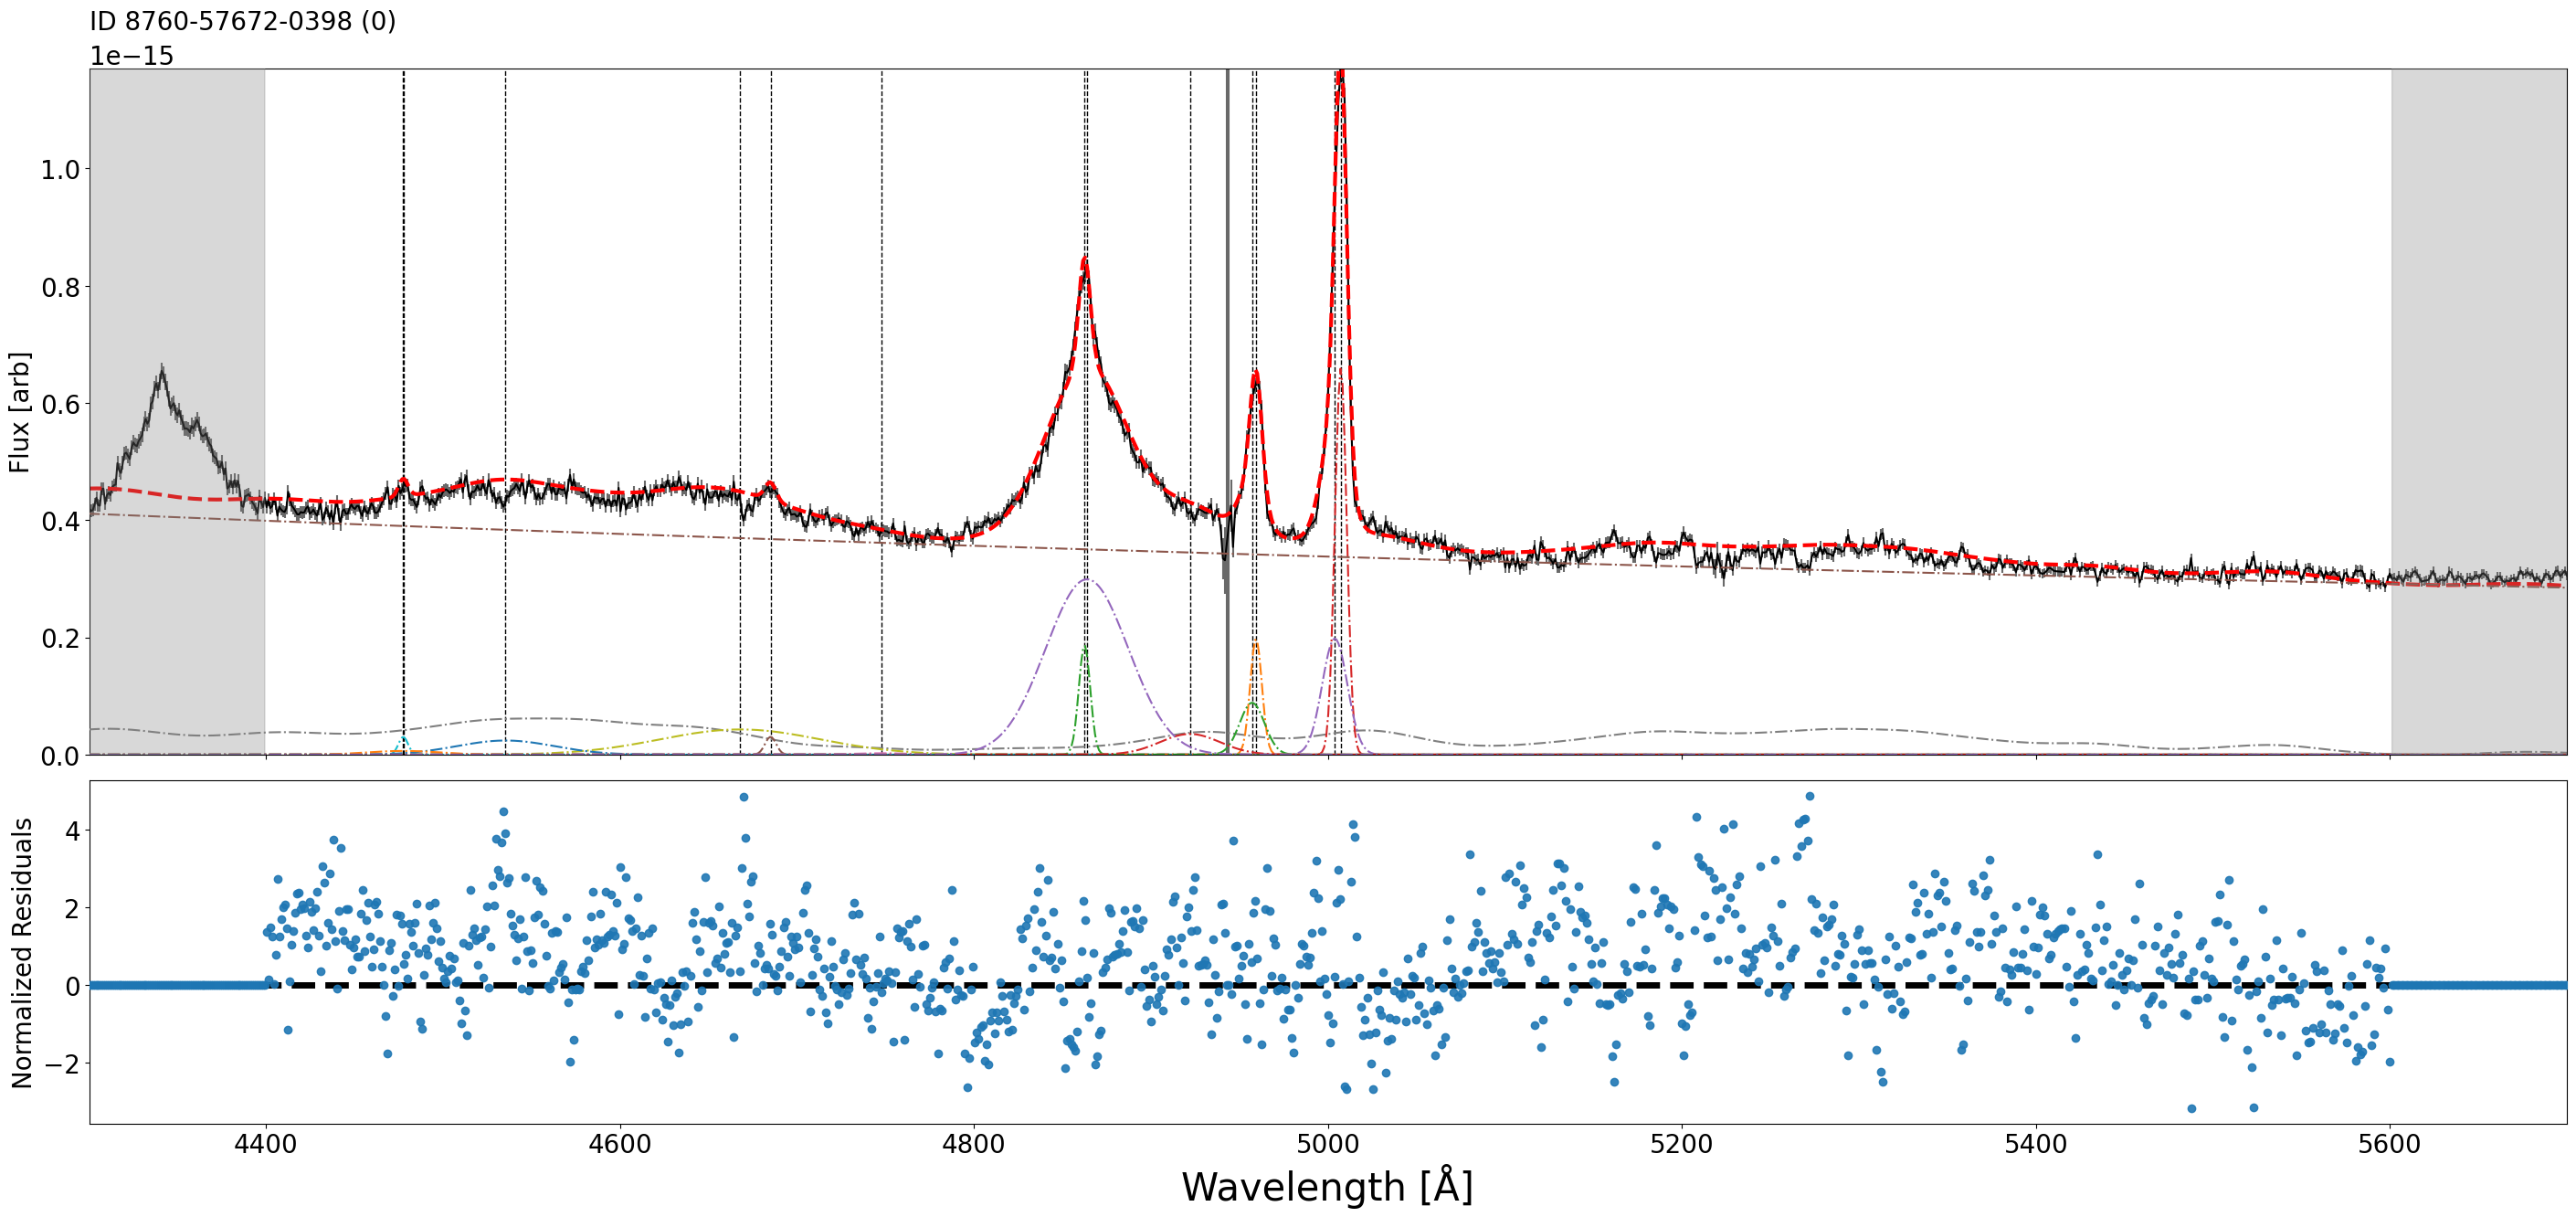

In [72]:
region_plot = SheapPlot(test_clase)
n = 0
region_plot.plot(n,add_name=False,xlim=[4300,5700])#207

In [30]:
_region_defs = test_clase._save()

Estimated pickle size: 25437.40 KB


In [31]:
_region_defs.keys()

dict_keys(['names', 'spectra', 'coords', 'z', 'extinction_correction', 'redshift_correction', 'params', 'params_dict', 'mask', 'complex_region', 'profile_params_index_list', 'profile_names', 'fitting_rutine', 'outer_limits', 'model_keywords'])

In [32]:
{key:type(value) for key,value in _region_defs.items()}

{'names': numpy.ndarray,
 'spectra': numpy.ndarray,
 'coords': numpy.ndarray,
 'z': numpy.ndarray,
 'extinction_correction': str,
 'redshift_correction': str,
 'params': numpy.ndarray,
 'params_dict': dict,
 'mask': numpy.ndarray,
 'complex_region': list,
 'profile_params_index_list': list,
 'profile_names': list,
 'fitting_rutine': dict,
 'outer_limits': tuple,
 'model_keywords': dict}

In [309]:
test_clase.save_to_pickle("second_save_236.pkl")

Estimated pickle size: 26659.78 KB


In [99]:
test2.params.shape

(225, 44)

In [137]:
test2 = Sheapectral.from_pickle("/home/favila/smbh_mass/sheap/notebooks/first_save.pkl")

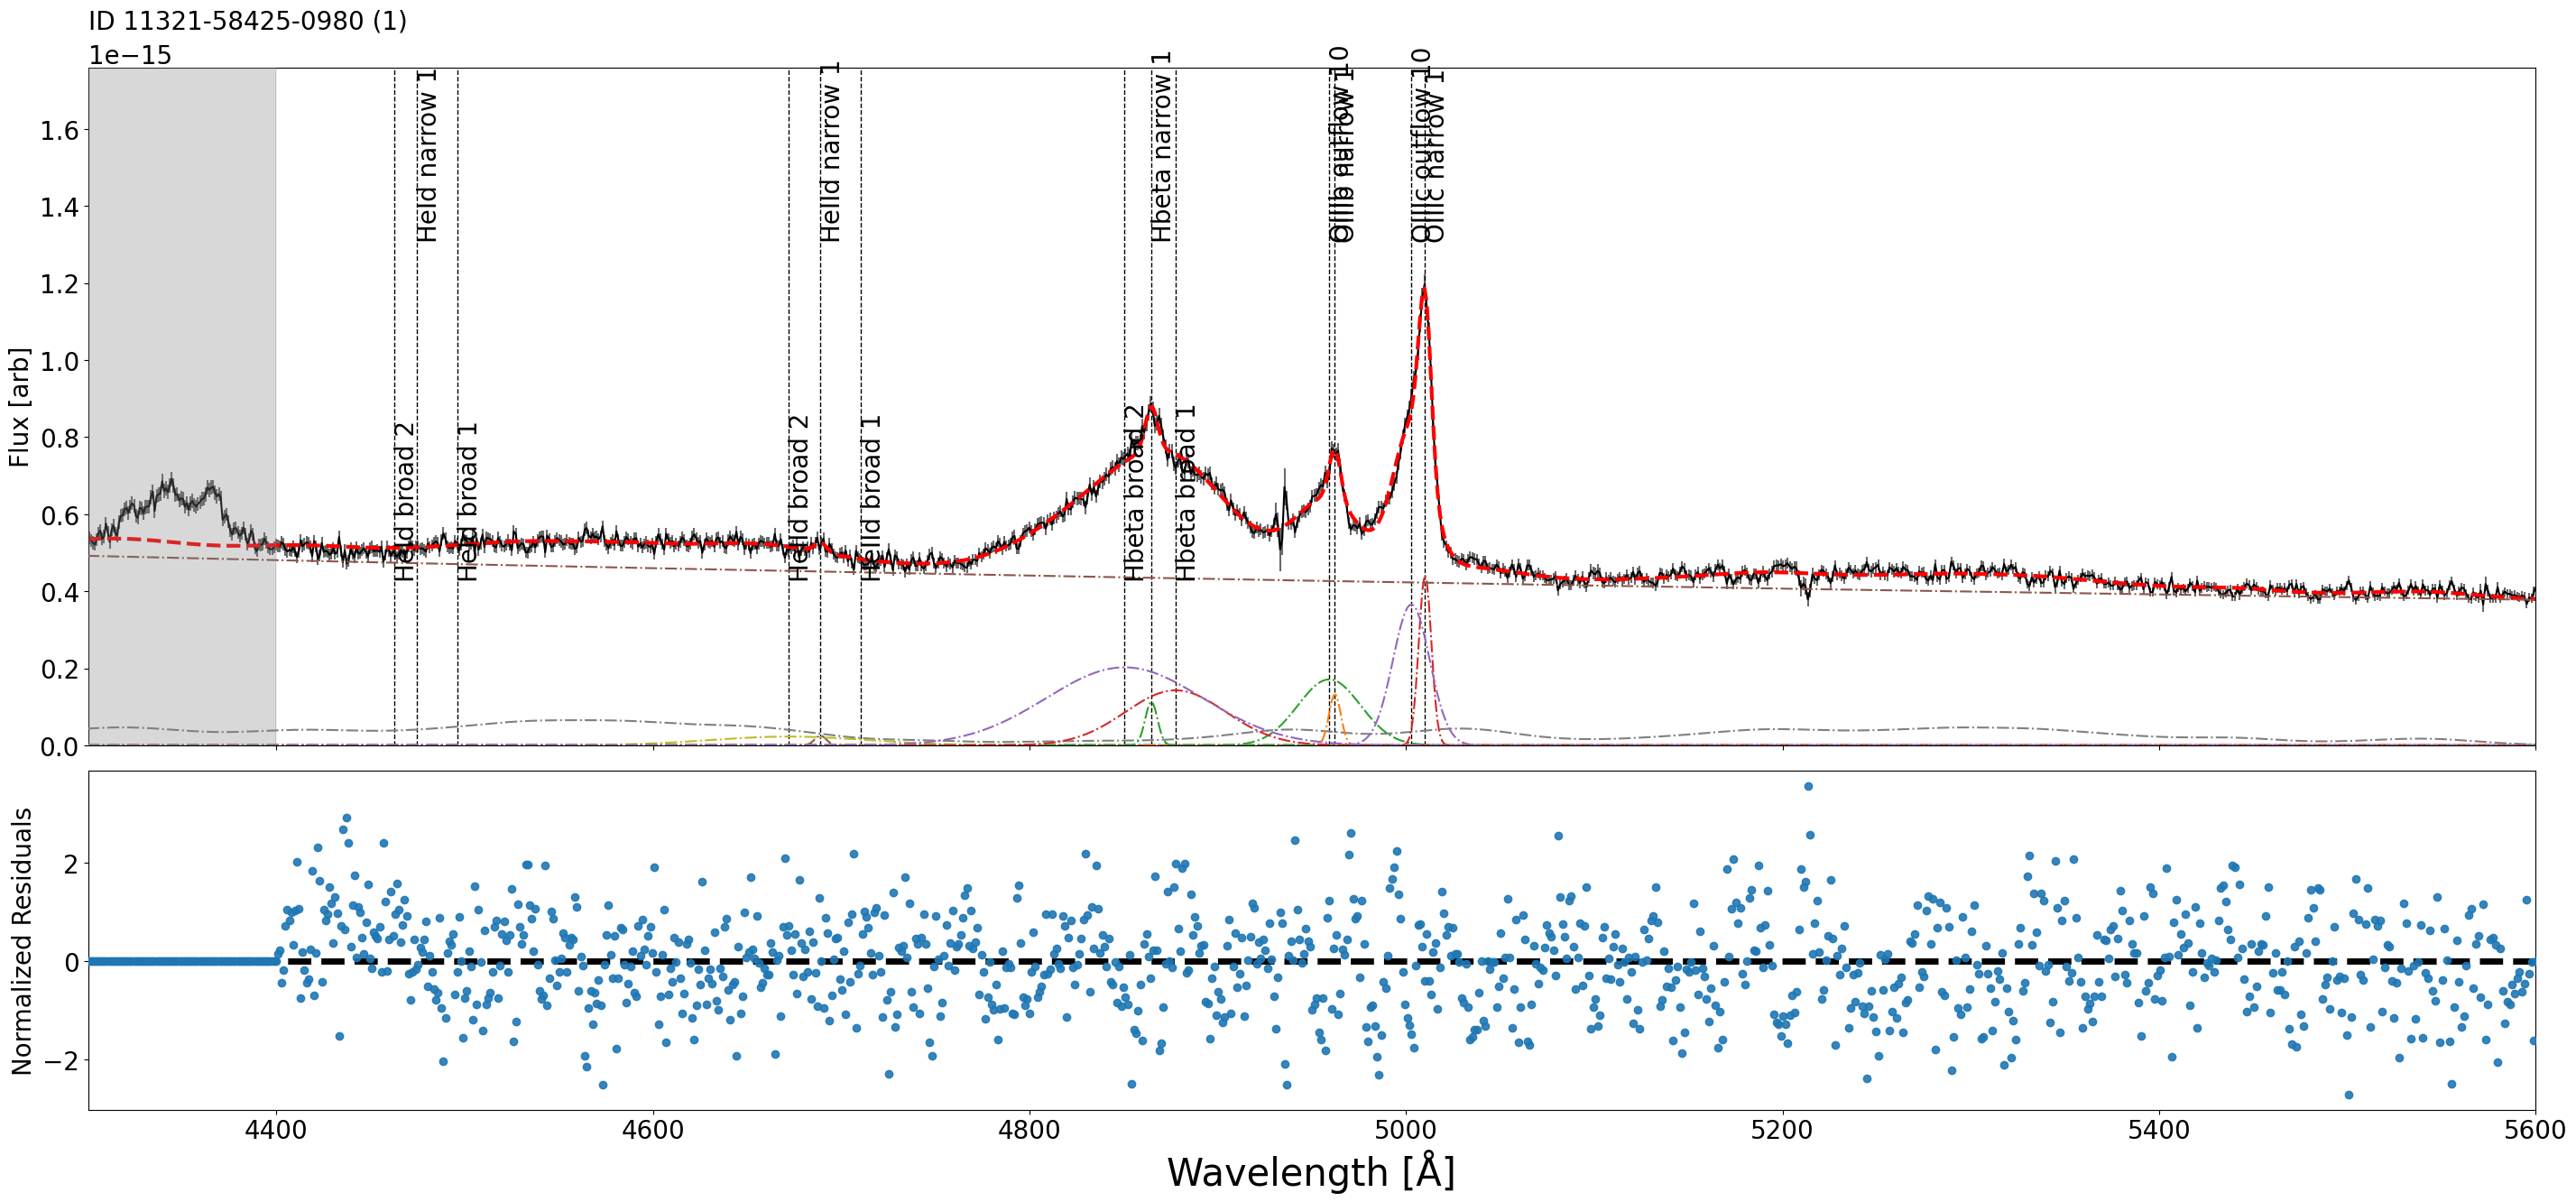

In [94]:
region_plot = SheapPlot(test2)
n = 1
region_plot.plot(n,add_name=True,xlim=[4300,5600])#207

In [218]:
# from sheap.RegionHandler.RegionBuilderv2 import RegionBuilderv2
# from sheap.RegionHandler.RegionFittingv2 import RegionFittingv2,is_list_of_SpectralLine
# from sheap.RegionHandler.suportclass import SpectralLine

In [132]:
region = RegionBuilder(4400, 5600,template_mode_fe=True,n_broad=2,add_outflow=True,by_region=True,force_linear=False,add_balmercontiniumm=True)

added OP template


In [133]:
region._fitting_rutine()

{'complex_region': [SpectralLine(center=0, line_name='feop', kind='fe', component=21, amplitude=0, how='template', region='OP', profile='fitFeOP', which='OP'),
  SpectralLine(center=4958.896072, line_name='OIIIb', kind='narrow', component=1, amplitude=1.0, how=None, region='narrow_basic', profile=None, which=None),
  SpectralLine(center=4958.896072, line_name='OIIIb', kind='outflow', component=10, amplitude=0.5, how=None, region='narrow_basic', profile=None, which=None),
  SpectralLine(center=5006.803341, line_name='OIIIc', kind='narrow', component=1, amplitude=1.0, how=None, region='narrow_basic', profile=None, which=None),
  SpectralLine(center=5006.803341, line_name='OIIIc', kind='outflow', component=10, amplitude=0.5, how=None, region='narrow_basic', profile=None, which=None),
  SpectralLine(center=4685.71, line_name='HeIId', kind='narrow', component=1, amplitude=1.0, how=None, region='helium', profile=None, which=None),
  SpectralLine(center=4685.71, line_name='HeIId', kind='broad

In [221]:
# power_test = {'complex_region':[region.regions_to_fit[-1]],'outer_limits':region._fitting_rutine(add_step=False)['outer_limits'],
#               "inner_limits":region._fitting_rutine(add_step=False)['inner_limits'],
#               "fitting_rutine":{'step1': {'tied':[],"non_optimize_in_axis":3}}}

In [14]:
region._fitting_rutine()

{'complex_region': [SpectralLine(center=0, line_name='feop', kind='fe', component=21, amplitude=0, how='template', region='OP', profile='fitFeOP', which='OP'),
  SpectralLine(center=4958.896072, line_name='OIIIb', kind='narrow', component=1, amplitude=1.0, how=None, region='narrow_basic', profile=None, which=None),
  SpectralLine(center=4958.896072, line_name='OIIIb', kind='outflow', component=10, amplitude=0.5, how=None, region='narrow_basic', profile=None, which=None),
  SpectralLine(center=5006.803341, line_name='OIIIc', kind='narrow', component=1, amplitude=1.0, how=None, region='narrow_basic', profile=None, which=None),
  SpectralLine(center=5006.803341, line_name='OIIIc', kind='outflow', component=10, amplitude=0.5, how=None, region='narrow_basic', profile=None, which=None),
  SpectralLine(center=4685.71, line_name='HeIId', kind='narrow', component=1, amplitude=1.0, how=None, region='helium', profile=None, which=None),
  SpectralLine(center=4685.71, line_name='HeIId', kind='broad

In [15]:
aja = RegionFitting(region._fitting_rutine(num_steps_list=[3000,3000]))
aja(Spectra,renormalize=False)
#aja._build_fit_componentsv2()

Fitting 225 spectra
STEP1
learning_rate: 0.1 num_steps: 3000 non_optimize_in_axis: 3
STEP2
learning_rate: 0.01 num_steps: 3000 non_optimize_in_axis: 4


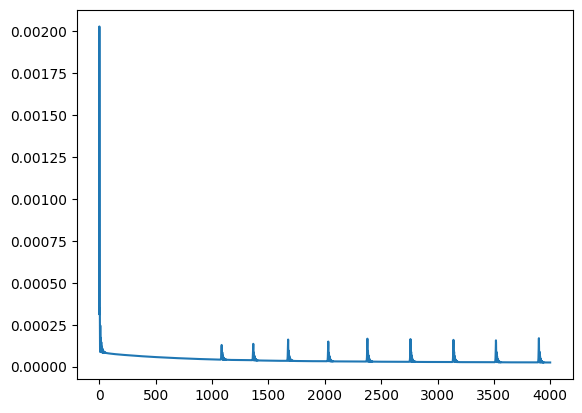

In [186]:
import numpy as np 
plt.plot(np.array(aja.loss).T[0])
#plt.ylim(0,1e-3)

In [136]:
from jax import jit,vmap
from sheap.Fitting.utils import combine_auto
ff = aja.mapping_lines("region","continuum")
profile_functions = list(ff["profile_functions"])
id_params = list(ff["profile_params_index_list"])
combine = jit(combine_auto(profile_functions))
comb_v = vmap(jit(combine_auto(profile_functions)),in_axes=(0,0))
Fe_2 = comb_v(aja.spec[:,0,:],aja.params[:,id_params])

Array([[0.55752885, 0.55752885, 0.55752885, 0.55752885, 0.55752885],
       [0.96282901, 0.96282901, 0.96282901, 0.96282901, 0.96282901],
       [1.05231921, 1.05231921, 1.05231921, 1.05231921, 1.05231921],
       [1.16495936, 1.16495936, 1.16495936, 1.16495936, 1.16495936],
       [1.85334529, 1.85334529, 1.85334529, 1.85334529, 1.85334529],
       [0.99818694, 0.99818694, 0.99818694, 0.99818694, 0.99818694],
       [0.37892104, 0.37892104, 0.37892104, 0.37892104, 0.37892104],
       [0.4550872 , 0.4550872 , 0.4550872 , 0.4550872 , 0.4550872 ],
       [0.84694175, 0.84694175, 0.84694175, 0.84694175, 0.84694175],
       [2.2985843 , 2.2985843 , 2.2985843 , 2.2985843 , 2.2985843 ],
       [0.21018175, 0.21018175, 0.21018175, 0.21018175, 0.21018175],
       [0.78910172, 0.78910172, 0.78910172, 0.78910172, 0.78910172],
       [0.17934945, 0.17934945, 0.17934945, 0.17934945, 0.17934945],
       [1.20434949, 1.20434949, 1.20434949, 1.20434949, 1.20434949],
       [1.44264873, 1.44264873, 1.

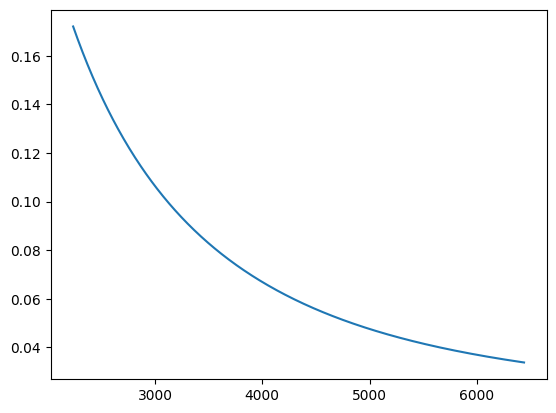

In [133]:
n = 8
#plt.plot(aja.spec[:,0,:][n],Fe[n])
plt.plot(aja.spec[:,0,:][n],Fe_2[n])

In [137]:
id_params

[np.int64(42), np.int64(43)]

In [ ]:
aja.params[:,id_params]


Array([[-1.23969445,  0.55752885],
       [-1.        ,  0.96282901],
       [-1.17306153,  1.05231921],
       [-1.        ,  1.16495936],
       [-1.        ,  1.85334529],
       [-1.13931156,  0.99818694],
       [-1.47064765,  0.37892104],
       [-1.00100209,  0.4550872 ],
       [-1.        ,  0.84694175],
       [-1.30903382,  2.2985843 ],
       [-1.34284763,  0.21018175],
       [-1.43256467,  0.78910172],
       [-1.        ,  0.17934945],
       [-1.        ,  1.20434949],
       [-1.11943213,  1.44264873],
       [-1.55960274,  1.03007037],
       [-1.07893696,  0.41411493],
       [-1.        ,  0.38469797],
       [-1.        ,  0.42892102],
       [-1.35803199,  0.57435621],
       [-1.43510855,  1.10703048],
       [-1.33918438,  0.80268547],
       [-1.09678427,  1.1514135 ],
       [-1.        ,  0.13306621],
       [-1.5108134 ,  0.19613363],
       [-1.        ,  1.88348889],
       [-1.        ,  0.22805716],
       [-1.15119844,  0.1736547 ],
       [-1.        ,

AttributeError: 'Sheapectral' object has no attribute 'spec'

In [ ]:
#def ShapeSave()

In [ ]:
# aja.region_defs_["fitting_rutine"]["step1"]['tied']

[['center_FeIIa_20_fe', 'center_FeIIh_20_fe'],
 ['width_FeIIa_20_fe', 'width_FeIIh_20_fe'],
 ['center_FeIIb_20_fe', 'center_FeIIh_20_fe'],
 ['width_FeIIb_20_fe', 'width_FeIIh_20_fe'],
 ['center_FeIIc_20_fe', 'center_FeIIh_20_fe'],
 ['width_FeIIc_20_fe', 'width_FeIIh_20_fe'],
 ['center_FeIId_20_fe', 'center_FeIIh_20_fe'],
 ['width_FeIId_20_fe', 'width_FeIIh_20_fe'],
 ['center_FeIIe_20_fe', 'center_FeIIh_20_fe'],
 ['width_FeIIe_20_fe', 'width_FeIIh_20_fe'],
 ['center_FeIIf_20_fe', 'center_FeIIh_20_fe'],
 ['width_FeIIf_20_fe', 'width_FeIIh_20_fe'],
 ['center_FeIIg_20_fe', 'center_FeIIh_20_fe'],
 ['width_FeIIg_20_fe', 'width_FeIIh_20_fe'],
 ['center_FeIIi_20_fe', 'center_FeIIh_20_fe'],
 ['width_FeIIi_20_fe', 'width_FeIIh_20_fe'],
 ['center_FeIIj_20_fe', 'center_FeIIh_20_fe'],
 ['width_FeIIj_20_fe', 'width_FeIIh_20_fe'],
 ['center_FeIIk_20_fe', 'center_FeIIh_20_fe'],
 ['width_FeIIk_20_fe', 'width_FeIIh_20_fe'],
 ['center_FeIIl_20_fe', 'center_FeIIh_20_fe'],
 ['width_FeIIl_20_fe', 'width_FeI

['106 127 -212.91599999999926',
 '107 128 *1',
 '109 127 -182.2569999999996',
 '110 128 *1',
 '112 127 -160.59999999999945',
 '113 128 *1',
 '115 127 -138.34399999999914',
 '116 128 *1',
 '118 127 -17.321999999999207',
 '119 128 *1',
 '121 127 -6.391999999999825',
 '122 128 *1',
 '124 127 -3.0869999999995343',
 '125 128 *1',
 '130 127 +28.720000000000255',
 '131 128 *1',
 '133 127 +37.05000000000018',
 '134 128 *1',
 '136 127 +108.95500000000084',
 '137 128 *1',
 '139 127 +499.33700000000044',
 '140 128 *1',
 '142 127 +737.317',
 '143 128 *1',
 '145 127 +764.3590000000004',
 '146 128 *1',
 '148 127 +795.9530000000004',
 '149 128 *1',
 '46 73 -530.1799999999994',
 '47 74 *1',
 '49 73 -375.0102999999999',
 '50 74 *1',
 '52 73 -353.9262999999992',
 '53 74 *1',
 '55 73 -284.4299999999994',
 '56 74 *1',
 '58 73 -244.23999999999978',
 '59 74 *1',
 '61 73 -231.21999999999935',
 '62 74 *1',
 '64 73 -202.35999999999967',
 '65 74 *1',
 '67 73 -49.10999999999967',
 '68 74 *1',
 '70 73 -39.4099999

In [ ]:
# region = RegionBuilder(4400, 5600)
# region.make_region(verbose=True,Fe_regions=['Fe_uv',"FeII_IZw1","feII_forbidden","FeII_coronal"],force_linear=True
#                    ,n_broad = 2,n_narrow =1,narrow_plus=False,add_out_flow=True,tied_narrow_to="OIIIc",template_mode_Fe=False)
# Hbeta_class = RegionFitting(region.to_complex(add_free=True))

We assume a local linear continuum


In [ ]:
class BalCon(model.RegriddableModel1D):
    def __init__(self, name="BalCon"):
        self.A = model.Parameter(name, "A", 1, min=tinyval, hard_min=0)
        self.T = model.Parameter(
            name, "T", 10000, min=5000, frozen=False, units="kelvins"
        )
        self.tau = model.Parameter(
            name, "tau", 1, min=0.01, hard_min=tinyval, max=2)

        model.RegriddableModel1D.__init__(
            self, name, (self.A, self.T, self.tau))

    def calc(self, pars, x, *args, **kwargs):
        """Evaluate the model"""
        return _balmer_conti(pars, x)

In [207]:
import jax.numpy as jnp
from jax import jit

@jit
def balmer_conti_jax(x,pars):
    """
    Compute the Balmer continuum (Dietrich+02) in pure JAX.

    Parameters
    ----------
    x : array-like
        Wavelengths in Angstrom.
    pars : array-like, shape (3,)
        pars[0] = A (amplitude)
        pars[1] = T (temperature in K)
        pars[2] = τ0 (optical‐depth scale)
   

    Returns
    -------
    result : ndarray
        Balmer continuum flux in the same shape as x.
    """
    # Constants
    h   = 6.62607015e-34   # Planck’s constant, J·s
    c   = 2.99792458e8     # Speed of light, m/s
    k_B = 1.380649e-23     # Boltzmann constant, J/K

    # Edge
    lambda_BE = 3646.0  # Å

    # Convert Å → m
    lam_m = x * 1e-10

    # Planck function B_λ(lam_m, T) [SI units]
    T = pars[1]
    exponent = h * c / (lam_m * k_B * T)
    B_lambda = (2.0 * h * c**2) / (lam_m**5 * (jnp.exp(exponent) - 1.0))

    # Apply the same “scale=10000” factor as in astropy’s BlackBody
    B_lambda *= 1e5

    # Optical depth τ(λ)
    tau = pars[2] * (x / lambda_BE)**3

    # Balmer-continuum formula
    result = pars[0] * B_lambda * (1.0 - jnp.exp(-tau))

    # Zero above the Balmer edge
    result = jnp.where(x > lambda_BE, 0.0, result)/1e18 #factor the normalisacion

    return result


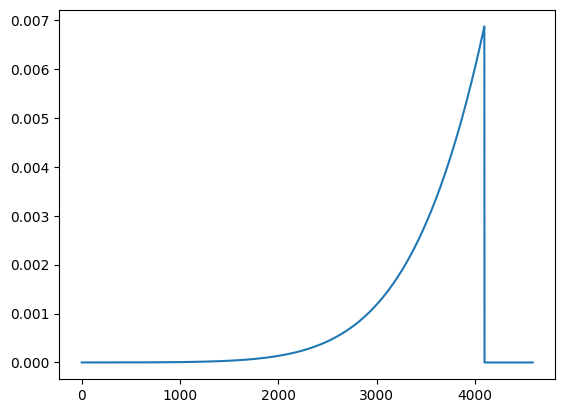

In [209]:
plt.plot(balmer_conti_jax(aja.spec[:,0,:],jnp.array([1,5000,0.01]))[0])